# Cell type reference files investigation

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy.io import mmread
import json

**!! NB: DISCO works only with `ad.__version__ = 0.9.2` !!**

In [3]:
ad.__version__

'0.9.2'

-----------------------------------------------------------------------------------------------------------
#### *Categories:*

In [2]:
# Dictionary for mapping cell types to cell categories

ct2cat = {
    # Neoplastic
    'Malignant': 'Neoplastic',

    # Lymphoid Immune Cells
    'T_cell': 'LIC',
    'NK_cell': 'LIC',
    'B_cell': 'LIC',
    'Plasma': 'LIC',
    'Plasmablast': 'LIC',

    # Myeloid Immune Cells
    'Myeloid': 'MIC',
    'Monocyte': 'MIC',
    'Dendritic': 'MIC',
    'Macrophage': 'MIC',
    'Mast': 'MIC',
    'Erythroblast': 'MIC',
    'Granulocytes': 'MIC',
    'Granulocyte': 'MIC',
    'HSC': 'MIC',
    
    # Connective
    'Endothelial': 'Connective',
    'Fibroblast': 'Connective',
    'Myofibroblast': 'Connective',
    'Pericyte': 'Connective',
    
    # Epithelial
    'Epithelial': 'Epithelial',
    
    # Handling NA values
    'nan': 'Unknown'
    }

In [3]:
# Dictionary for mapping cell categories to indexes

cat2idx = {
    'Neoplastic': 0,
    'LIC': 1,
    'MIC': 2,
    'Connective': 3,
    'Epithelial': 4,
    'Unknown': 5
    }

In [4]:
# Dictionary for mapping cell categories to colors

cat2color = {
    'Neoplastic': [255, 51, 51],    # (Red)
    'LIC': [255, 87, 51],           # (Orange)
    'MIC': [51, 255, 87],           # (Green)
    'Connective': [51, 87, 255],    # (Blue)
    'Epithelial': [255, 215, 0],    # (Yellow)
    'Unknown': [128, 128, 128]      # (Grey)
}

In [5]:
# Save dict ct2cat in json file
with open("../data/dicts_annots/ct2cat_ref.json", "w") as f:
    json.dump(ct2cat, f)

In [6]:
# Save dict cat2idx in json file
with open("../data/dicts_annots/cat2idx_ref.json", "w") as f:
    json.dump(cat2idx, f)

In [7]:
# Save dict cat2color in json file
with open("../data/dicts_annots/cat2color_ref.json", "w") as f:
    json.dump(cat2color, f)

-----------------------------------------------------------------------------------------------------------

## 1. Breast cancer

### 1.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/breast  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20893

In [8]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Wu2021_Breast/Exp_data_UMIcounts.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Wu2021_Breast/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Wu2021_Breast/Cells.csv")

adata1_breast = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_2657/2964685260.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  cells_df = pd.read_csv("../data/sc_atlas/cancer_cell_atlas/Data_Wu2021_Breast/Cells.csv")
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
adata1_breast


AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'cell_name', 'sample', 'cell_type', 'cell_subtype', 'celltype_subset', 'patient', 'disease', 'gender', 'age', 'grade', 'cancer_type', 'ER', 'PR', 'HER2_IHC', 'HER2_ISH_ratio', 'Ki67', 'subtype_IHC', 'treatment', 'details_treatment', 'notable_pathological_features', 'stage', 'complexity'
    var: 0

In [10]:
# Rename gene column and put as index
adata1_breast.var.columns = ['gene_name']
adata1_breast.var.set_index('gene_name', inplace=True)
adata1_breast.var

""
gene_name
RP11-34P13.7
FO538757.3
FO538757.2
AP006222.2
RP4-669L17.10
...
RP11-983C2.3
LINC00919
RP11-589P10.7


In [11]:
adata1_breast.obs

,cell_name,sample,cell_type,cell_subtype,celltype_subset,patient,disease,gender,age,grade,...,PR,HER2_IHC,HER2_ISH_ratio,Ki67,subtype_IHC,treatment,details_treatment,notable_pathological_features,stage,complexity
0,CID3586_AAGACCTCAGCATGAG,CID3586,Endothelial,Endothelial ACKR1,Endothelial ACKR1,CID3586,HER2+,Female,43.0,3.0,...,100% 2-3+,3+,Amplified (6.8),30-50%,HER2+/ER+,Naïve,-,Multifocal tumour with associatied high grade ...,"pT(m)2, N2a",1689
1,CID3586_AAGGTTCGTAGTACCT,CID3586,Endothelial,Endothelial ACKR1,Endothelial ACKR1,CID3586,HER2+,Female,43.0,3.0,...,100% 2-3+,3+,Amplified (6.8),30-50%,HER2+/ER+,Naïve,-,Multifocal tumour with associatied high grade ...,"pT(m)2, N2a",779
2,CID3586_ACCAGTAGTTGTGGCC,CID3586,Endothelial,Endothelial ACKR1,Endothelial ACKR1,CID3586,HER2+,Female,43.0,3.0,...,100% 2-3+,3+,Amplified (6.8),30-50%,HER2+/ER+,Naïve,-,Multifocal tumour with associatied high grade ...,"pT(m)2, N2a",514
3,CID3586_ACCCACTAGATGTCGG,CID3586,Endothelial,Endothelial ACKR1,Endothelial ACKR1,CID3586,HER2+,Female,43.0,3.0,...,100% 2-3+,3+,Amplified (6.8),30-50%,HER2+/ER+,Naïve,-,Multifocal tumour with associatied high grade ...,"pT(m)2, N2a",609
4,CID3586_ACTGATGGTCAACTGT,CID3586,Endothelial,Endothelial ACKR1,Endothelial ACKR1,CID3586,HER2+,Female,43.0,3.0,...,100% 2-3+,3+,Amplified (6.8),30-50%,HER2+/ER+,Naïve,-,Multifocal tumour with associatied high grade ...,"pT(m)2, N2a",807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,CID4398,Dendritic,DCs,Myeloid_c0_DC_LAMP3,CID4398,ER+,Female,52.0,3.0,...,80% 2+,2+,Non-Amplified,0.75,ER+,Treated,Neoadjuvant FEC-D,Mixed morphology with associated high grade DC...,"pT3, pN2a, pMx, Stage IIIA",1251
100060,CID4398_TCTATTGTCGCCATAA,CID4398,Dendritic,DCs,Myeloid_c0_DC_LAMP3,CID4398,ER+,Female,52.0,3.0,...,80% 2+,2+,Non-Amplified,0.75,ER+,Treated,Neoadjuvant FEC-D,Mixed morphology with associated high grade DC...,"pT3, pN2a, pMx, Stage IIIA",719
100061,CID4398_TCTTTCCCAGTAAGCG,CID4398,Dendritic,DCs,Myeloid_c0_DC_LAMP3,CID4398,ER+,Female,52.0,3.0,...,80% 2+,2+,Non-Amplified,0.75,ER+,Treated,Neoadjuvant FEC-D,Mixed morphology with associated high grade DC...,"pT3, pN2a, pMx, Stage IIIA",887
100062,CID4398_TGCCCATGTTACGGAG,CID4398,Dendritic,DCs,Myeloid_c0_DC_LAMP3,CID4398,ER+,Female,52.0,3.0,...,80% 2+,2+,Non-Amplified,0.75,ER+,Treated,Neoadjuvant FEC-D,Mixed morphology with associated high grade DC...,"pT3, pN2a, pMx, Stage IIIA",870


<Axes: xlabel='cell_type'>

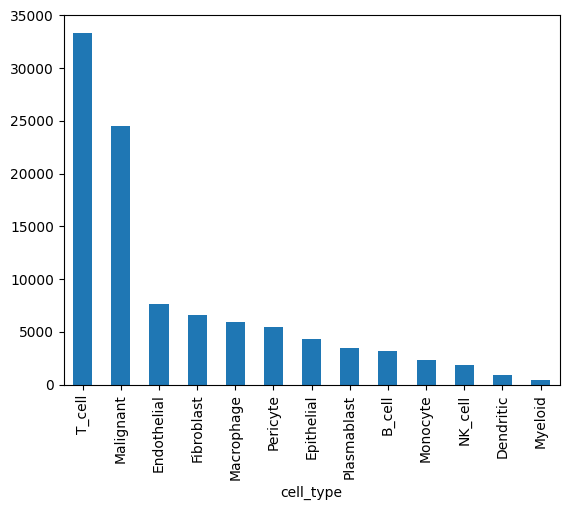

In [12]:
adata1_breast.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

<Axes: xlabel='cell_subtype'>

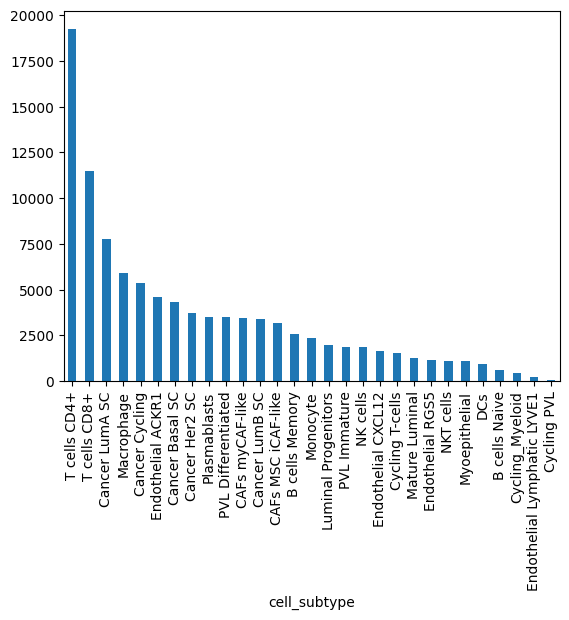

In [13]:
adata1_breast.obs["cell_subtype"].value_counts(dropna=False).plot(kind="bar")

In [14]:
# Save ref data in h5ad file
adata1_breast._X = adata1_breast.X.toarray()
adata1_breast.obs = adata1_breast.obs.astype(str)
adata1_breast.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/breast_atlas.h5ad")

In [15]:
adata1_breast = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/breast_atlas.h5ad")

<Axes: xlabel='ct_cat'>

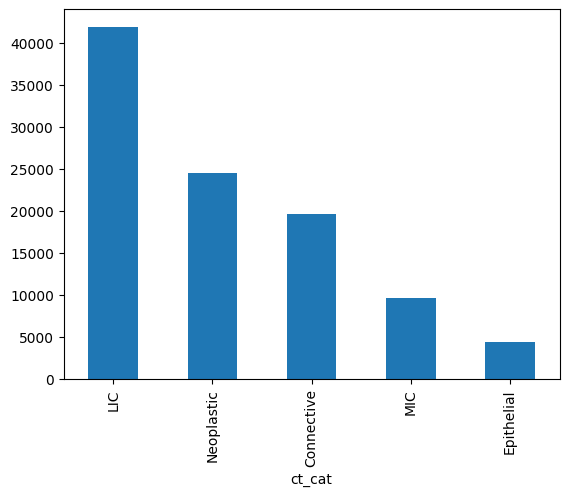

In [16]:
adata1_breast.obs['ct_cat'] = adata1_breast.obs['cell_type'].map(ct2cat)
adata1_breast.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 1.2. Disco

In [17]:
# Open data
adata2_breast = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_breast_v2.1.h5ad")

In [18]:
adata2_breast

AnnData object with n_obs × n_vars = 174638 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rp', 'sample', 'sampleId', 'projectId', 'sampleType', 'anatomicalSite', 'disease', 'tissue', 'platform', 'cellSorting', 'timePoint', 'subjectId', 'age', 'gender', 'medicalCondition', 'processStatus', 'menopause', 'ct'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [19]:
# Rename gene column
adata2_breast.var.columns = ['gene_name']
adata2_breast.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [20]:
# Rename cell type column
adata2_breast.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_breast.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rp,sample,sampleId,projectId,sampleType,anatomicalSite,...,platform,cellSorting,timePoint,subjectId,age,gender,medicalCondition,processStatus,menopause,cell_type
AAACCTGAGTGGGTTG-1--ERX6174477,0,3395.0,1525,2.209131,24.123711,ERX6174477,ERX6174477,E-MTAB-10885,Normal,NA,...,10x3'v2,NA,NA,NA,33.0,F,NA,QC pass,NA,CXCL14 mammary basal cell
AAACCTGCATCGGACC-1--ERX6174477,0,5321.0,1827,2.912986,38.338658,ERX6174477,ERX6174477,E-MTAB-10885,Normal,NA,...,10x3'v2,NA,NA,NA,33.0,F,NA,QC pass,NA,SFN mammary luminal progenitor
AAACCTGGTCTCGTTC-1--ERX6174477,0,2721.0,1251,1.764057,27.122381,ERX6174477,ERX6174477,E-MTAB-10885,Normal,NA,...,10x3'v2,NA,NA,NA,33.0,F,NA,QC pass,NA,CXCL14 mammary basal cell
AAACCTGTCCAGATCA-1--ERX6174477,0,2700.0,1284,3.555556,16.444444,ERX6174477,ERX6174477,E-MTAB-10885,Normal,NA,...,10x3'v2,NA,NA,NA,33.0,F,NA,QC pass,NA,Venous EC
AAACCTGTCCAGGGCT-1--ERX6174477,0,24794.0,4652,2.016617,46.805679,ERX6174477,ERX6174477,E-MTAB-10885,Normal,NA,...,10x3'v2,NA,NA,NA,33.0,F,NA,QC pass,NA,SFN mammary luminal progenitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGCATTCAGGT-1--GSM5852274,0,89240.0,9376,8.611609,5.766472,GSM5852274,GSM5852274,GSE195861,Normal,NA,...,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,NA,KRT17 mammary luminal cell
TTTGGTTAGACTCAAA-1--GSM5852274,0,29066.0,6852,3.853299,7.634349,GSM5852274,GSM5852274,GSE195861,Normal,NA,...,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,NA,KRT17 mammary luminal cell
TTTGGTTAGGTCTGGA-1--GSM5852274,0,17592.0,4542,12.022510,1.404047,GSM5852274,GSM5852274,GSE195861,Normal,NA,...,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,NA,PIP mammary luminal cell
TTTGTTGGTGCTAGCC-1--GSM5852274,0,10797.0,3691,0.037047,0.676114,GSM5852274,GSM5852274,GSE195861,Normal,NA,...,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,NA,PIP mammary luminal cell


<Axes: xlabel='cell_type'>

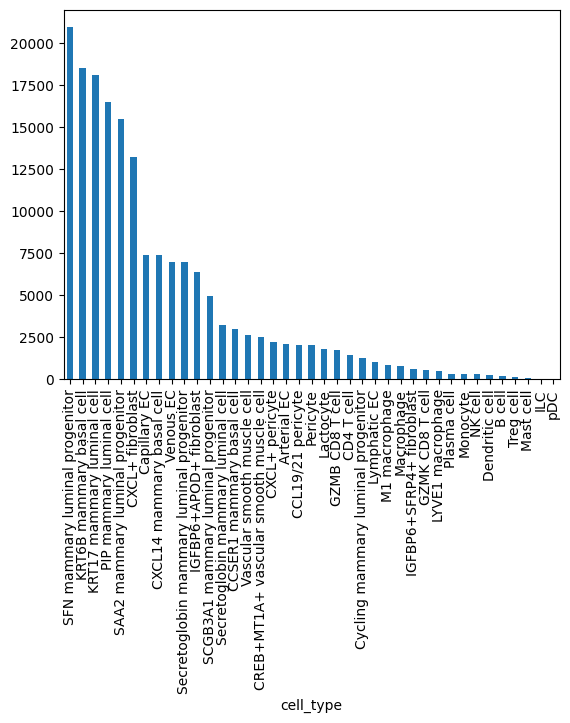

In [21]:
adata2_breast.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 2. Colon cancer

### 2.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/colorectal  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20086

In [22]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Lee2020_Colorectal/Exp_data_UMIcounts.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Lee2020_Colorectal/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Lee2020_Colorectal/Cells.csv")

adata1_colon = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [23]:
adata1_colon

AnnData object with n_obs × n_vars = 21657 × 22276
    obs: 'cell_name', 'sample', 'cell_type', 'subclone', 'complexity'
    var: 0

In [24]:
# Rename gene column and put as index
adata1_colon.var.columns = ['gene_name']
adata1_colon.var.set_index('gene_name', inplace=True)
adata1_colon.var

""
gene_name
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
ZYG11B
ZYX
ZZEF1


In [25]:
adata1_colon.obs

,cell_name,sample,cell_type,subclone,complexity
0,SMC01-T_AAACCTGAGAAGGTTT,SMC01,T_cell,0,1400
1,SMC01-T_AAACCTGAGGTAGCTG,SMC01,T_cell,0,1249
2,SMC01-T_AAACCTGCATACGCCG,SMC01,Malignant,1,4787
3,SMC01-T_AAACCTGGTCGCATAT,SMC01,Malignant,1,5175
4,SMC01-T_AAACCTGGTTCCTCCA,SMC01,T_cell,0,1245
...,...,...,...,...,...
21652,SMC25-T_TTTGCGCAGACACGAC,SMC25,Malignant,1,5016
21653,SMC25-T_TTTGCGCCATGGAATA,SMC25,NaN,0,3376
21654,SMC25-T_TTTGGTTCAACGCACC,SMC25,B_cell,0,1745
21655,SMC25-T_TTTGGTTGTAGGGTAC,SMC25,Epithelial,0,2765


<Axes: xlabel='cell_type'>

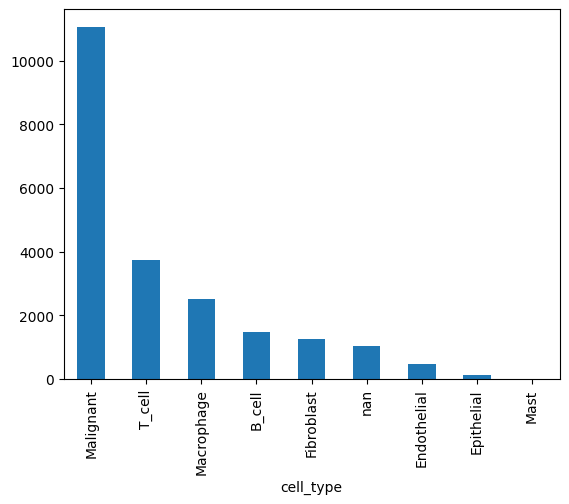

In [26]:
adata1_colon.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

In [27]:
# Save ref data in h5ad file
adata1_colon._X = adata1_colon.X.toarray()
adata1_colon.obs = adata1_colon.obs.astype(str)
adata1_colon.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/colon_atlas.h5ad")

In [28]:
adata1_colon = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/colon_atlas.h5ad")

<Axes: xlabel='ct_cat'>

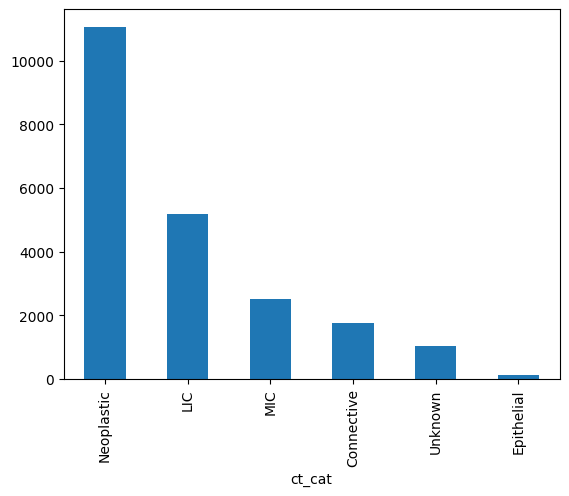

In [29]:
adata1_colon.obs['ct_cat'] = adata1_colon.obs['cell_type'].map(ct2cat)
adata1_colon.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 2.2. Disco

In [30]:
# Open data
adata2_colon = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_intestine_v1.0.h5ad")

In [31]:
adata2_colon

AnnData object with n_obs × n_vars = 286631 × 33434
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rp', 'sample', 'sampleId', 'projectId', 'sampleType', 'anatomicalSite', 'tissue', 'platform', 'ageGroup', 'cellSorting', 'treatment', 'subjectId', 'age', 'gender', 'ct'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [32]:
# Rename gene column
adata2_colon.var.columns = ['gene_name']
adata2_colon.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [33]:
# Rename cell type column
adata2_colon.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_colon.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rp,sample,sampleId,projectId,sampleType,anatomicalSite,tissue,platform,ageGroup,cellSorting,treatment,subjectId,age,gender,cell_type
AAACCTGAGAACAATC-1--ERX4577537,0,4493.0,2187,2.075020,28.284118,ERX4577537,ERX4577537,E-MTAB-9489,Normal,duodenum,intestine,10x3',fetal 122 days,NA,NA,8,NaN,F,Cycling ACTG2+ contractile pericyte
AAACCTGAGGACATTA-1--ERX4577537,0,2878.0,1636,3.219645,21.473397,ERX4577537,ERX4577537,E-MTAB-9489,Normal,duodenum,intestine,10x3',fetal 122 days,NA,NA,8,NaN,F,CRYAB+PLAT+ glial cell
AAACCTGAGGTGTTAA-1--ERX4577537,0,3337.0,1790,2.297155,29.673340,ERX4577537,ERX4577537,E-MTAB-9489,Normal,duodenum,intestine,10x3',fetal 122 days,NA,NA,8,NaN,F,Myofibroblast
AAACCTGAGTACGTAA-1--ERX4577537,0,3423.0,1761,1.593444,22.080583,ERX4577537,ERX4577537,E-MTAB-9489,Normal,duodenum,intestine,10x3',fetal 122 days,NA,NA,8,NaN,F,ADAMDEC1+CXCL14+ fibroblast
AAACCTGAGTGTTGAA-1--ERX4577537,0,3184.0,1695,2.415567,28.785507,ERX4577537,ERX4577537,E-MTAB-9489,Normal,duodenum,intestine,10x3',fetal 122 days,NA,NA,8,NaN,F,C1QTNF3+SHISA3+COL14A1+ fibroblast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTCTAAGG-1--ERX3620260,0,2670.0,1046,8.895406,13.000978,ERX3620260,ERX3620260,E-MTAB-8474,Normal,sigmoid colon (lamina propria),intestine,10x5',65 to 70,NA,CD45 enriched,417c,NaN,M,Macrophage
TTTCCTCCAGGACCCT-1--ERX3620260,0,7240.0,1256,6.296888,10.958062,ERX3620260,ERX3620260,E-MTAB-8474,Normal,sigmoid colon (lamina propria),intestine,10x5',65 to 70,NA,CD45 enriched,417c,NaN,M,Plasma cell
TTTGCGCGTGGGTCAA-1--ERX3620260,0,12264.0,789,1.457680,3.887147,ERX3620260,ERX3620260,E-MTAB-8474,Normal,sigmoid colon (lamina propria),intestine,10x5',65 to 70,NA,CD45 enriched,417c,NaN,M,Plasma cell
TTTGGTTTCCACGTGG-1--ERX3620260,0,5369.0,693,3.018182,2.381818,ERX3620260,ERX3620260,E-MTAB-8474,Normal,sigmoid colon (lamina propria),intestine,10x5',65 to 70,NA,CD45 enriched,417c,NaN,M,Plasma cell


<Axes: xlabel='cell_type'>

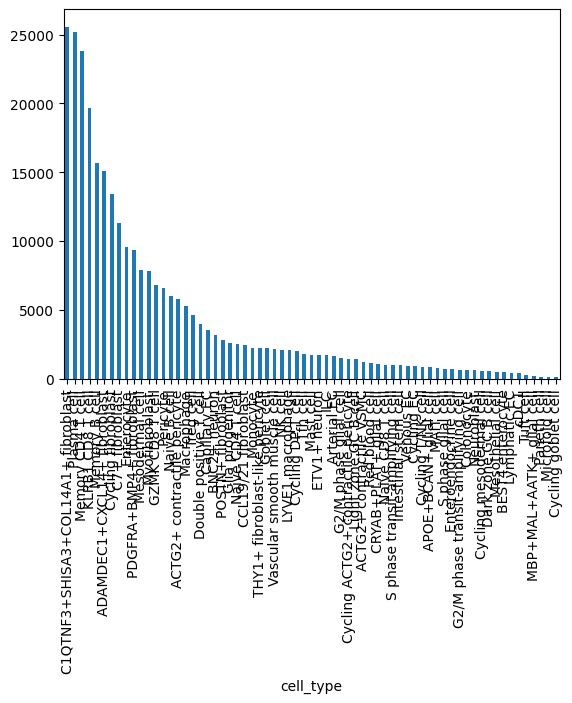

In [34]:
adata2_colon.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 3. Heart cancer

### 3.1. Cancer cell atlas

Nothing

### 3.2. Disco

In [35]:
# Open data
adata2_heart = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_heart_v01.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [36]:
adata2_heart

AnnData object with n_obs × n_vars = 624358 × 33234
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'sample', 'sampleId', 'projectId', 'sampleType', 'anatomicalSite', 'tissue', 'platform', 'ageGroup', 'cellSorting', 'subjectId', 'age', 'gender', 'processStatus', 'predicted_cell_type', 'ct', 'RNA_snn_res.0.8'
    var: 'gene'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [37]:
# Rename gene column
adata2_heart.var.columns = ['gene_name']
adata2_heart.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [38]:
# Rename cell type column
adata2_heart.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_heart.obs

,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters,sample,sampleId,projectId,sampleType,anatomicalSite,tissue,platform,ageGroup,cellSorting,subjectId,age,gender,processStatus,predicted_cell_type,cell_type,RNA_snn_res.0.8
AAACCTGAGAGTACCG-1--GSM5572792,0,3742.0,1923,1,GSM5572792,GSM5572792,GSE183852,Normal,Transmural LV Apex,heart,10x5'v2,NA,NA,NA,NaN,NA,QC pass,27:pericyte,Pericyte,1
AAACCTGAGCTGCCCA-1--GSM5572792,0,1136.0,702,3,GSM5572792,GSM5572792,GSE183852,Normal,Transmural LV Apex,heart,10x5'v2,NA,NA,NA,NaN,NA,QC pass,20:general capillary EC,Capillary EC,23
AAACCTGCAGACAGGT-1--GSM5572792,0,2318.0,1327,1,GSM5572792,GSM5572792,GSE183852,Normal,Transmural LV Apex,heart,10x5'v2,NA,NA,NA,NaN,NA,QC pass,27:pericyte,Pericyte,1
AAACCTGCAGATCTGT-1--GSM5572792,0,2977.0,1691,17,GSM5572792,GSM5572792,GSE183852,Normal,Transmural LV Apex,heart,10x5'v2,NA,NA,NA,NaN,NA,QC pass,22:venous EC,Venous EC,9
AAACCTGCAGGATCGA-1--GSM5572792,0,3496.0,2122,21,GSM5572792,GSM5572792,GSE183852,Normal,Transmural LV Apex,heart,10x5'v2,NA,NA,NA,NaN,NA,QC pass,5:cDC2,Monocyte,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCAGTTCGTGGACC-1--GSM5415725,0,7255.0,2370,23,GSM5415725,GSM5415725,GSE179343,Normal,NA,heart,10x3'v3,NA,immune cell,NA,46.0,NA,QC pass,0:CD14 monocyte,cDC,16
TTTCATGGTATCGCGC-1--GSM5415725,0,5435.0,2001,23,GSM5415725,GSM5415725,GSE179343,Normal,NA,heart,10x3'v3,NA,immune cell,NA,46.0,NA,QC pass,0:CD14 monocyte,cDC,16
TTTCCTCCATCAGTGT-1--GSM5415725,0,5824.0,2148,23,GSM5415725,GSM5415725,GSE179343,Normal,NA,heart,10x3'v3,NA,immune cell,NA,46.0,NA,QC pass,0:CD14 monocyte,cDC,16
TTTCGATGTAGGAAAG-1--GSM5415725,0,6531.0,2140,23,GSM5415725,GSM5415725,GSE179343,Normal,NA,heart,10x3'v3,NA,immune cell,NA,46.0,NA,QC pass,0:CD14 monocyte,cDC,16


<Axes: xlabel='cell_type'>

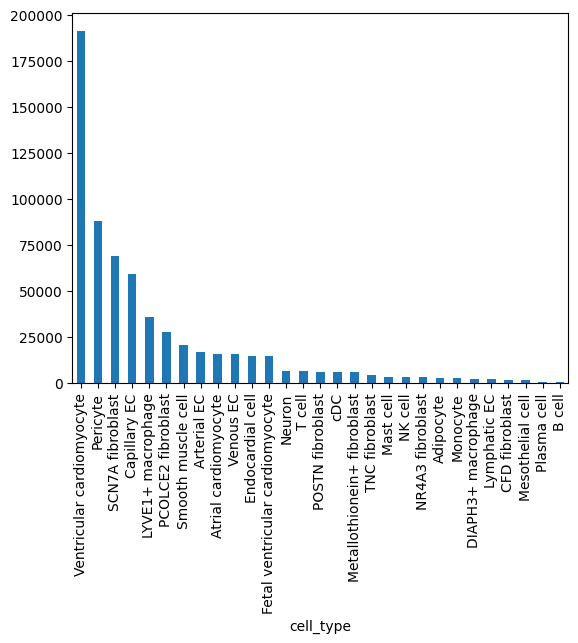

In [39]:
adata2_heart.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 4. Kidney cancer

### 4.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/kidney  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20821

In [40]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Krishna2021_Kidney/Exp_data_UMIcounts.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Krishna2021_Kidney/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Krishna2021_Kidney/Cells.csv")

adata1_kidney = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [41]:
adata1_kidney

AnnData object with n_obs × n_vars = 167283 × 15588
    obs: 'cell_name', 'sample', 'cell_type', 'cell_subtype', 'patient', 'source', 'type', 'cluster', 'treatment', 'complexity'
    var: 0

In [42]:
# Rename gene column and put as index
adata1_kidney.var.columns = ['gene_name']
adata1_kidney.var.set_index('gene_name', inplace=True)
adata1_kidney.var

""
gene_name
LINC00115
FAM41C
SAMD11
NOC2L
KLHL17
...
C21orf58
PCNT
DIP2A


In [43]:
adata1_kidney.obs

,cell_name,sample,cell_type,cell_subtype,patient,source,type,cluster,treatment,complexity
0,AAACCTGAGCGTTGCC_1_UT1_Center,UT1_Center,T_cell,CD8A+ NK-like,UT1,Center,Tumor,4,Untreated 1,1513
1,AAACCTGAGCTGCCCA_1_UT1_Center,UT1_Center,T_cell,CD8A+ Proliferating,UT1,Center,Tumor,15,Untreated 1,1652
2,AAACCTGAGTGGACGT_1_UT1_Center,UT1_Center,T_cell,CD8A+ Exhausted IEG,UT1,Center,Tumor,19,Untreated 1,1356
3,AAACCTGCAGGTCGTC_1_UT1_Center,UT1_Center,NK_cell,Conventional NK,UT1,Center,Tumor,10,Untreated 1,1016
4,AAACCTGCAGGTCTCG_1_UT1_Center,UT1_Center,T_cell,CD8A+ Tissue-resident,UT1,Center,Tumor,2,Untreated 1,902
...,...,...,...,...,...,...,...,...,...,...
167278,TTTGTCATCCATGAAC_1_t4_PBMC,t4_PBMC,T_cell,CD4+ Naive,t4,PBMC,PBMC,3,Ipi/Nivo complete response,582
167279,TTTGTCATCGCGGATC_1_t4_PBMC,t4_PBMC,NK_cell,Conventional NK,t4,PBMC,PBMC,10,Ipi/Nivo complete response,622
167280,TTTGTCATCTCAAACG_1_t4_PBMC,t4_PBMC,T_cell,CD4+ Naive,t4,PBMC,PBMC,3,Ipi/Nivo complete response,641
167281,TTTGTCATCTGTCTCG_1_t4_PBMC,t4_PBMC,NK_cell,Conventional NK,t4,PBMC,PBMC,10,Ipi/Nivo complete response,495


<Axes: xlabel='cell_type'>

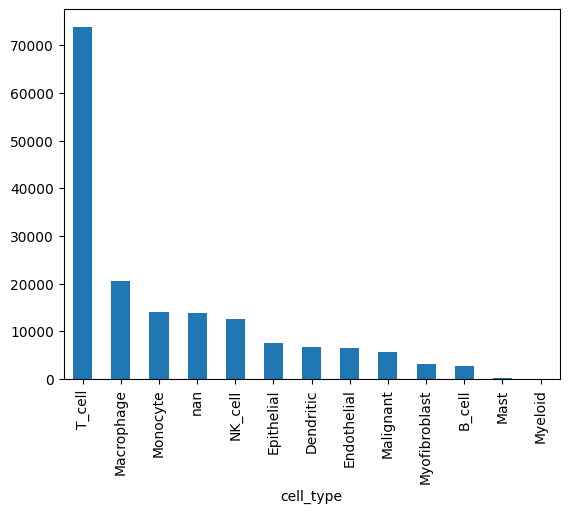

In [44]:
adata1_kidney.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

<Axes: xlabel='cell_subtype'>

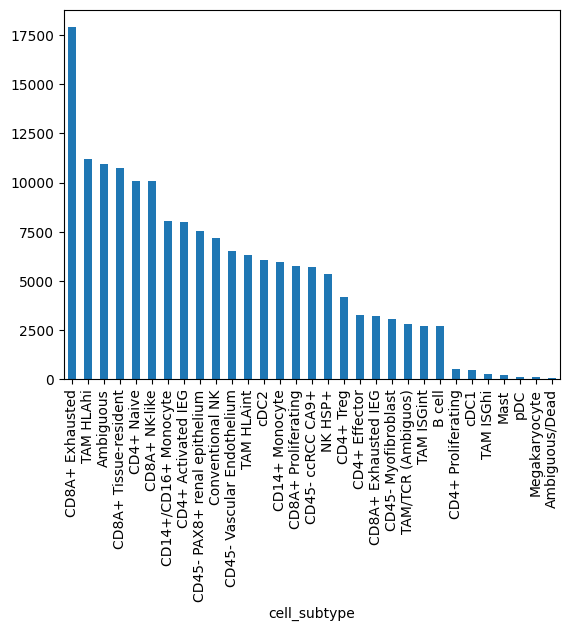

In [45]:
adata1_kidney.obs["cell_subtype"].value_counts(dropna=False).plot(kind="bar")

In [46]:
# Save ref data in h5ad file
adata1_kidney._X = adata1_kidney.X.toarray()
adata1_kidney.obs = adata1_kidney.obs.astype(str)
adata1_kidney.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/kidney_atlas.h5ad")

In [47]:
adata1_kidney = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/kidney_atlas.h5ad")

<Axes: xlabel='ct_cat'>

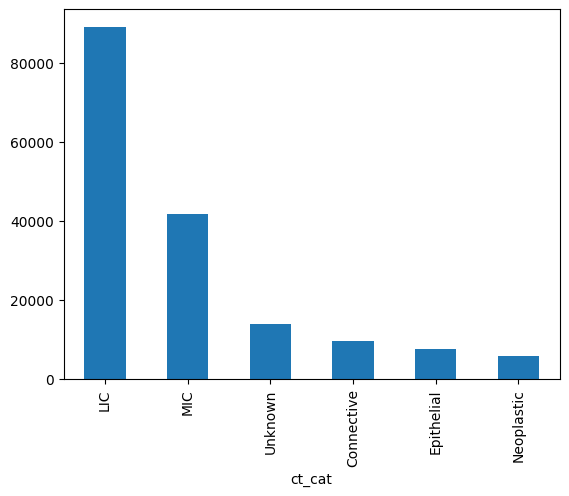

In [48]:
adata1_kidney.obs['ct_cat'] = adata1_kidney.obs['cell_type'].map(ct2cat)
adata1_kidney.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 4.2. Disco

In [49]:
# Open data
adata2_kidney = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_kidney_v01.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [50]:
adata2_kidney

AnnData object with n_obs × n_vars = 103547 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'predicted_cell_type', 'sample', 'sample_id', 'project_id', 'sample_type', 'anatomical_site', 'disease', 'tissue', 'platform', 'cell_sorting', 'disease_subtype', 'time_point', 'subject_id', 'age', 'gender', 'race', 'bmi', 'disease_stage', 'process_status', 'ct'
    var: 'gene'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [51]:
# Rename gene column
adata2_kidney.var.columns = ['gene_name']
adata2_kidney.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [52]:
# Rename cell type column
adata2_kidney.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_kidney.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,predicted_cell_type,sample,sample_id,project_id,sample_type,...,disease_subtype,time_point,subject_id,age,gender,race,bmi,disease_stage,process_status,cell_type
AAACCTGAGCGATATA-1--GSM4339775,0,1521.0,844,9,17,9:peritubular capillary endothelial cell,GSM4339775,GSM4339775,GSE145927,explant,...,NA,28 days,NA,NaN,NA,NA,NA,NA,QC pass,Capillary EC
AAACCTGAGCTAGTCT-1--GSM4339775,0,1761.0,894,9,17,9:peritubular capillary endothelial cell,GSM4339775,GSM4339775,GSE145927,explant,...,NA,28 days,NA,NaN,NA,NA,NA,NA,QC pass,Capillary EC
AAACCTGAGGTACTCT-1--GSM4339775,0,2317.0,1189,11,19,22:endothelial cell,GSM4339775,GSM4339775,GSE145927,explant,...,NA,28 days,NA,NaN,NA,NA,NA,NA,QC pass,Arterial EC
AAACCTGAGTTAAGTG-1--GSM4339775,0,2311.0,1052,9,17,9:peritubular capillary endothelial cell,GSM4339775,GSM4339775,GSE145927,explant,...,NA,28 days,NA,NaN,NA,NA,NA,NA,QC pass,Capillary EC
AAACCTGCAAAGCGGT-1--GSM4339775,0,5571.0,2163,32,8,8:epithelial cell progenitor,GSM4339775,GSM4339775,GSE145927,explant,...,NA,28 days,NA,NaN,NA,NA,NA,NA,QC pass,Renal epithelial cell - Loop of Henle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGATATGCA-1--GSM4145204,0,1264.0,603,3,11,11:epithelial cell of proximal tubule,GSM4145204,GSM4145204,GSE131685,adjacent normal,...,papillary urothelial carcinoma of the renal pe...,NA,NA,57.0,M,NA,25.6,NA,QC pass,Renal epithelial cell - proximal tubules
TTTGTCAAGTGGGATC-1--GSM4145204,0,2155.0,856,3,11,11:epithelial cell of proximal tubule,GSM4145204,GSM4145204,GSE131685,adjacent normal,...,papillary urothelial carcinoma of the renal pe...,NA,NA,57.0,M,NA,25.6,NA,QC pass,Renal epithelial cell - proximal tubules
TTTGTCACATGCGCAC-1--GSM4145204,0,1301.0,725,28,4,3:epithelial cell of proximal tubule,GSM4145204,GSM4145204,GSE131685,adjacent normal,...,papillary urothelial carcinoma of the renal pe...,NA,NA,57.0,M,NA,25.6,NA,QC pass,Renal epithelial cell - proximal tubules
TTTGTCAGTTTGACAC-1--GSM4145204,0,3197.0,1246,28,4,3:epithelial cell of proximal tubule,GSM4145204,GSM4145204,GSE131685,adjacent normal,...,papillary urothelial carcinoma of the renal pe...,NA,NA,57.0,M,NA,25.6,NA,QC pass,Renal epithelial cell - proximal tubules


<Axes: xlabel='cell_type'>

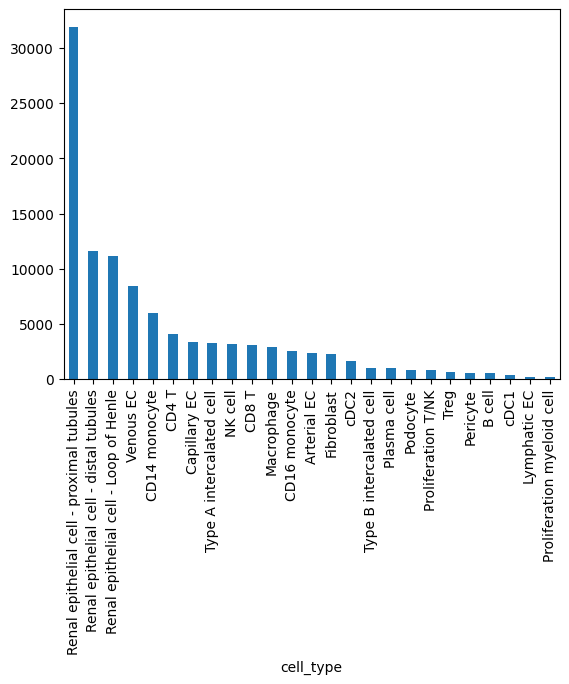

In [53]:
adata2_kidney.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 5. Liver cancer

### 5.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/liverbiliary  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20109

In [54]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Sun2021_Liver-Biliary/Exp_data_TPM.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Sun2021_Liver-Biliary/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Sun2021_Liver-Biliary/Cells.csv")

adata1_liver = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [55]:
adata1_liver

AnnData object with n_obs × n_vars = 16498 × 19744
    obs: 'cell_name', 'sample', 'source', 'disease', 'cell_type', 'cell_subtype_clusters', 'complexity'
    var: 0

In [56]:
# Rename gene column and put as index
adata1_liver.var.columns = ['gene_name']
adata1_liver.var.set_index('gene_name', inplace=True)
adata1_liver.var

""
gene_name
OR4F5
FO538757.2
FO538757.1
OR4F29
OR4F16
...
AC004556.1
AC233755.2
AC233755.1


In [57]:
adata1_liver.obs

,cell_name,sample,source,disease,cell_type,cell_subtype_clusters,complexity
0,P01_T_0001,P01,Tumor,Relapsed_HCC,Malignant,C10_Tumor,8444
1,P01_T_0003,P01,Tumor,Relapsed_HCC,Malignant,C10_Tumor,6481
2,P01_T_0004,P01,Tumor,Relapsed_HCC,NK_cell,C4_NK,7517
3,P01_T_0007,P01,Tumor,Relapsed_HCC,Malignant,C10_Tumor,6625
4,P01_T_0008,P01,Tumor,Relapsed_HCC,Endothelial,C17_Endo.,7891
...,...,...,...,...,...,...,...
16493,P19_T_0138,P19,Tumor,Primary_HCC,T_cell,C1_Tcell,8611
16494,P19_T_0139,P19,Tumor,Primary_HCC,Malignant,C14_Tumor,8255
16495,P19_T_0143,P19,Tumor,Primary_HCC,Malignant,C14_Tumor,9421
16496,P19_T_0144,P19,Tumor,Primary_HCC,T_cell,C3_Tcell,8692


<Axes: xlabel='cell_type'>

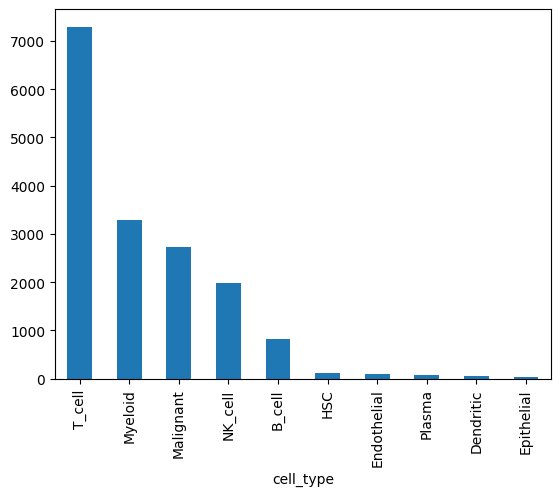

In [58]:
adata1_liver.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

<Axes: xlabel='cell_subtype_clusters'>

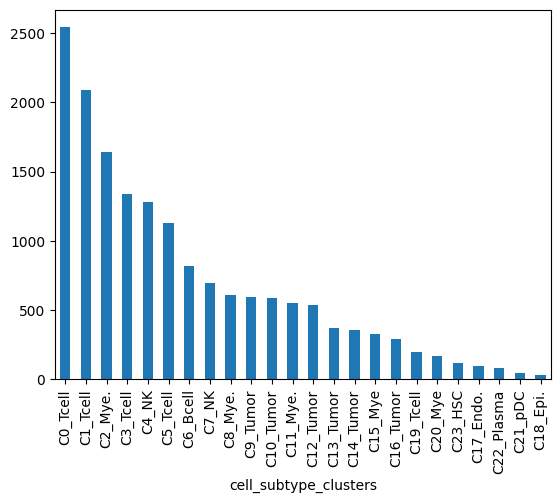

In [59]:
adata1_liver.obs["cell_subtype_clusters"].value_counts(dropna=False).plot(kind="bar")

In [60]:
# Save ref data in h5ad file
adata1_liver._X = adata1_liver.X.toarray()
adata1_liver.obs = adata1_liver.obs.astype(str)
adata1_liver.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/liver_atlas.h5ad")

In [61]:
adata1_liver = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/liver_atlas.h5ad")

<Axes: xlabel='ct_cat'>

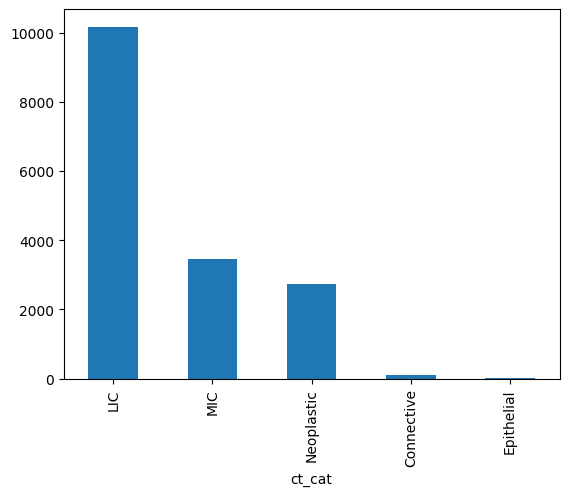

In [62]:
adata1_liver.obs['ct_cat'] = adata1_liver.obs['cell_type'].map(ct2cat)
adata1_liver.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 5.2. Disco

In [63]:
# Open data
adata2_liver = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_liver_v2.0.h5ad")

In [64]:
adata2_liver

AnnData object with n_obs × n_vars = 282105 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'sampleId', 'projectId', 'sampleType', 'anatomicalSite', 'disease', 'causeOfDeath', 'tissue', 'platform', 'ageGroup', 'cellSorting', 'diseaseSubtype', 'timePoint', 'subjectId', 'age', 'gender', 'race', 'bmi', 'infection', 'smoking', 'alcoholIntake', 'drugUse', 'processStatus', 'percent.mt', 'percent.rp', 'ct'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [65]:
# Rename gene column
adata2_liver.var.columns = ['gene_name']
adata2_liver.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [66]:
# Rename cell type column
adata2_liver.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_liver.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,sampleId,projectId,sampleType,anatomicalSite,disease,causeOfDeath,...,race,bmi,infection,smoking,alcoholIntake,drugUse,processStatus,percent.mt,percent.rp,cell_type
AAACCTGAGTCGATAA-1--GSM4041158,0,4705.0,1401,GSM4041158,GSM4041158,GSE136103,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,3.145590,40.616366,MAIT cell
AAACCTGAGTTTGCGT-1--GSM4041158,0,5035.0,1039,GSM4041158,GSM4041158,GSE136103,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,4.468719,52.452830,Naive B cell
AAACCTGCAATCCAAC-1--GSM4041158,0,4175.0,1488,GSM4041158,GSM4041158,GSE136103,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,3.544910,26.347305,CD56 NK cell
AAACCTGCACTAGTAC-1--GSM4041158,0,5639.0,1744,GSM4041158,GSM4041158,GSE136103,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,1.294556,31.831885,MAIT cell
AAACCTGCAGATGAGC-1--GSM4041158,0,2645.0,1088,GSM4041158,GSM4041158,GSE136103,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,3.856333,22.835539,CD56 NK cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCAGGTGATTA-1--GSM3178783,0,3484.0,903,GSM3178783,GSM3178783,GSE115469,Normal,NA,NA,Head Trauma,...,white,31.7,CMV+ EBV+,NA,NA,NA,QC pass,5.510907,8.065442,Hepatocyte
TTTCCTCAGTGTCTCA-1--GSM3178783,0,1687.0,608,GSM3178783,GSM3178783,GSE115469,Normal,NA,NA,Head Trauma,...,white,31.7,CMV+ EBV+,NA,NA,NA,QC pass,8.950800,29.282750,Plasma cell
TTTCCTCTCCGCAGTG-1--GSM3178783,0,3054.0,894,GSM3178783,GSM3178783,GSE115469,Normal,NA,NA,Head Trauma,...,white,31.7,CMV+ EBV+,NA,NA,NA,QC pass,10.805501,10.641781,Hepatocyte
TTTGGTTGTAAGCACG-1--GSM3178783,0,2675.0,727,GSM3178783,GSM3178783,GSE115469,Normal,NA,NA,Head Trauma,...,white,31.7,CMV+ EBV+,NA,NA,NA,QC pass,8.186916,35.887850,ProB cell


<Axes: xlabel='cell_type'>

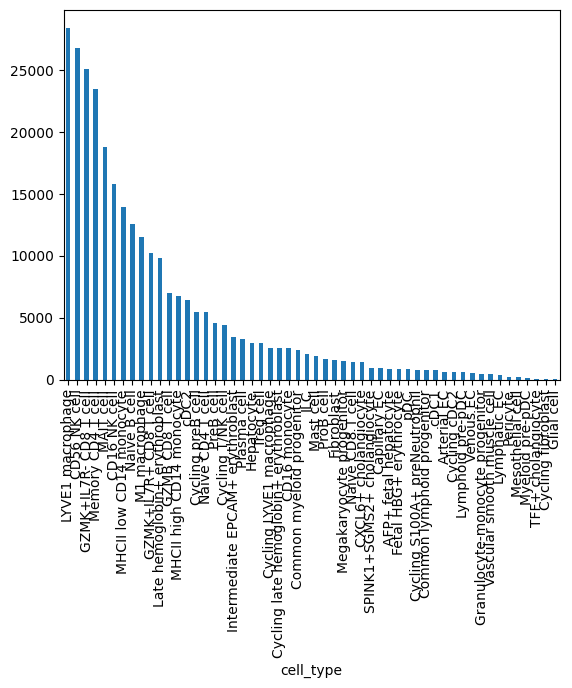

In [67]:
adata2_liver.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 6. Lung cancer

### 6.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/lung  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20115

In [68]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Xing2021_Lung/Exp_data_UMIcounts.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Xing2021_Lung/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Xing2021_Lung/Cells.csv")

adata1_lung = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [69]:
adata1_lung

AnnData object with n_obs × n_vars = 118293 × 17541
    obs: 'cell_name', 'sample', 'source', 'cell_type', 'cell_subtype_clusters', 'cell_subtype', 'complexity'
    var: 0

In [70]:
# Rename gene column and put as index
adata1_lung.var.columns = ['gene_name']
adata1_lung.var.set_index('gene_name', inplace=True)
adata1_lung.var

""
gene_name
RP11-34P13.7
FO538757.2
AP006222.2
RP4-669L17.10
RP11-206L10.9
...
AC007325.4
AC007325.2
AL354822.1


In [71]:
adata1_lung.obs

,cell_name,sample,source,cell_type,cell_subtype_clusters,cell_subtype,complexity
0,NM3N_nLung_AAACCTGCACGTCTCT,NM3N,Normal_Lung,T_cell,CD4-C1,CD4+_Tcells,884
1,NM3N_nLung_AAACCTGCAGCTGCTG,NM3N,Normal_Lung,T_cell,CD4-C2,CD4+_Tcells,948
2,NM3N_nLung_AAACCTGCAGTACACT,NM3N,Normal_Lung,T_cell,CD4-C2,CD4+_Tcells,1232
3,NM3N_nLung_AAACCTGGTAAGCACG,NM3N,Normal_Lung,T_cell,CD8-C1,CD8+_Tcells,1097
4,NM3N_nLung_AAACCTGGTCCCTTGT,NM3N,Normal_Lung,T_cell,CD8-C1,CD8+_Tcells,761
...,...,...,...,...,...,...,...
118288,NM6E_mLUAD_TACTTACCAAGTAGTA,NM6E,Primary_LUAD_with_Met,Malignant,Malignant,Malignant,1589
118289,NM6E_mLUAD_TAGTTGGGTCCTGCTT,NM6E,Primary_LUAD_with_Met,Malignant,Malignant,Malignant,2131
118290,NM6E_mLUAD_TCAGCTCCAGTGGGAT,NM6E,Primary_LUAD_with_Met,Epithelial,EPCAM+ cells,EPCAM+_cells,377
118291,NM6E_mLUAD_TGGGCGTCAGGTCCAC,NM6E,Primary_LUAD_with_Met,Malignant,Malignant,Malignant,1703


<Axes: xlabel='cell_type'>

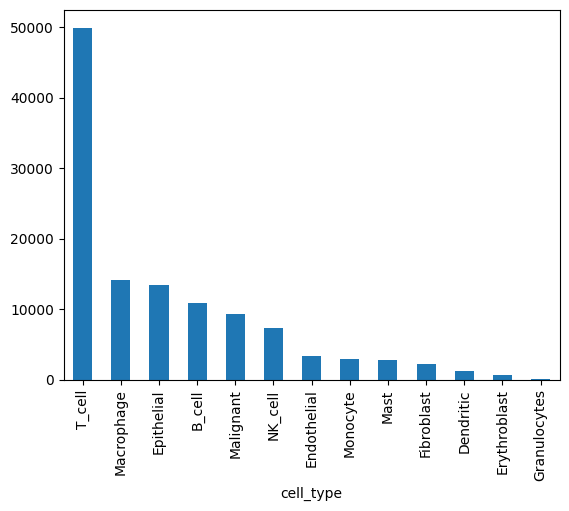

In [72]:
adata1_lung.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

<Axes: xlabel='cell_subtype'>

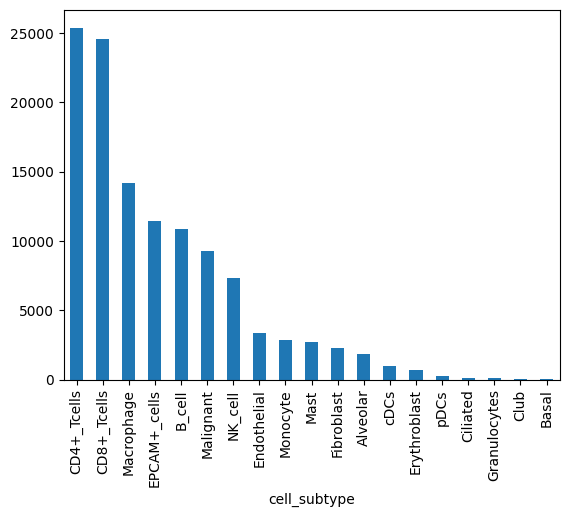

In [73]:
adata1_lung.obs["cell_subtype"].value_counts(dropna=False).plot(kind="bar")

In [74]:
# Save ref data in h5ad file
adata1_lung._X = adata1_lung.X.toarray()
adata1_lung.obs = adata1_lung.obs.astype(str)
adata1_lung.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/lung_atlas.h5ad")

In [75]:
adata1_lung = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/lung_atlas.h5ad")

<Axes: xlabel='ct_cat'>

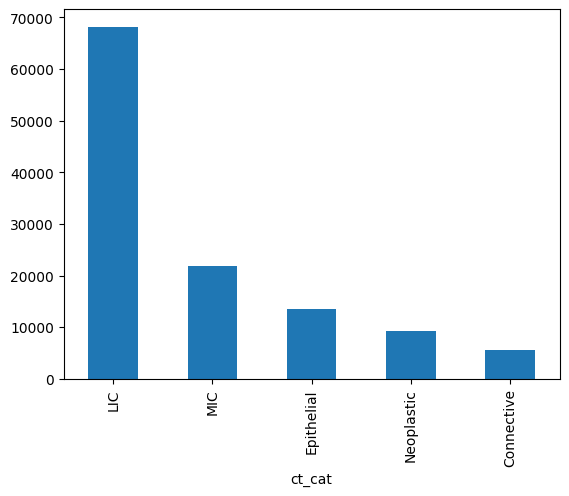

In [76]:
adata1_lung.obs['ct_cat'] = adata1_lung.obs['cell_type'].map(ct2cat)
adata1_lung.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 6.2. Disco

In [77]:
# Open data
adata2_lung = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_lung_v2.0.h5ad")

In [78]:
adata2_lung

AnnData object with n_obs × n_vars = 221012 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'sampleId', 'projectId', 'sampleType', 'anatomicalSite', 'disease', 'causeOfDeath', 'tissue', 'platform', 'ageGroup', 'cellSorting', 'treatment', 'subjectId', 'age', 'gender', 'race', 'bmi', 'infection', 'smoking', 'alcoholIntake', 'diseaseStage', 'medicalCondition', 'processStatus', 'percent.mt', 'percent.rp', 'ct'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [79]:
# Rename gene column
adata2_lung.var.columns = ['gene_name']
adata2_lung.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [80]:
# Rename cell type column
adata2_lung.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_lung.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,sampleId,projectId,sampleType,anatomicalSite,disease,causeOfDeath,...,bmi,infection,smoking,alcoholIntake,diseaseStage,medicalCondition,processStatus,percent.mt,percent.rp,cell_type
AAACCTGAGACAGGCT-1--ERX2757114,0,4748.0,1543,ERX2757114,ERX2757114,E-MTAB-6653,Adjacent normal,normal tissue adjacent to tumour,lung carcinoma,NA,...,NA,NA,NA,NA,NA,NA,QC pass,4.591407,14.658804,M1 macrophage
AAACCTGCAAGGGTCA-1--ERX2757114,0,5917.0,1644,ERX2757114,ERX2757114,E-MTAB-6653,Adjacent normal,normal tissue adjacent to tumour,lung carcinoma,NA,...,NA,NA,NA,NA,NA,NA,QC pass,4.089910,17.289167,Alveolar macrophage
AAACCTGCACAGCGTC-1--ERX2757114,0,2885.0,1031,ERX2757114,ERX2757114,E-MTAB-6653,Adjacent normal,normal tissue adjacent to tumour,lung carcinoma,NA,...,NA,NA,NA,NA,NA,NA,QC pass,5.303293,29.428076,CD16 monocyte
AAACCTGCACGCTTTC-1--ERX2757114,0,12407.0,2421,ERX2757114,ERX2757114,E-MTAB-6653,Adjacent normal,normal tissue adjacent to tumour,lung carcinoma,NA,...,NA,NA,NA,NA,NA,NA,QC pass,2.297090,12.952366,Alveolar macrophage
AAACCTGCAGACGTAG-1--ERX2757114,0,2762.0,1153,ERX2757114,ERX2757114,E-MTAB-6653,Adjacent normal,normal tissue adjacent to tumour,lung carcinoma,NA,...,NA,NA,NA,NA,NA,NA,QC pass,5.648081,28.131789,Naive B cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCATTTCCTAACAG-1--GSM5020384,0,13870.0,3790,GSM5020384,GSM5020384,GSE164829,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,5.710166,27.764960,Alveolar macrophage
TTGTTGTCATCTTTCA-1--GSM5020384,0,21899.0,5278,GSM5020384,GSM5020384,GSE164829,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,4.817572,12.845335,CXCL14+POSTN+ fibroblast
TTTACCACAAATGAAC-1--GSM5020384,0,2495.0,1183,GSM5020384,GSM5020384,GSE164829,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,0.040080,27.615230,Alveolar macrophage
TTTATGCAGGCTCCCA-1--GSM5020384,0,17324.0,4744,GSM5020384,GSM5020384,GSE164829,Normal,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,QC pass,0.588779,6.361118,CXCL14+POSTN+ fibroblast


<Axes: xlabel='cell_type'>

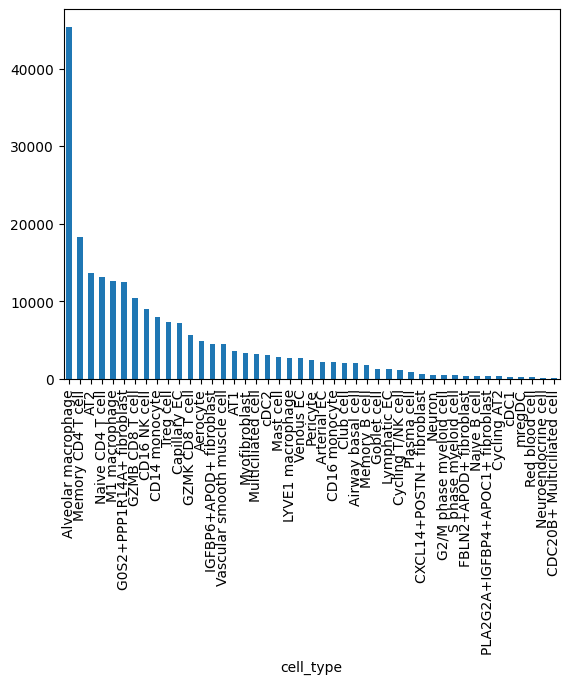

In [81]:
adata2_lung.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 7. Pancreatic cancer

### 7.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/pancreas  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20108

In [82]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Steele2020_Pancreas/Exp_data_UMIcounts.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Steele2020_Pancreas/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Steele2020_Pancreas/Cells.csv")

adata1_pancreatic = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [83]:
adata1_pancreatic

AnnData object with n_obs × n_vars = 48570 × 32738
    obs: 'cell_name', 'sample', 'cell_type', 'complexity'
    var: 0

In [84]:
# Rename gene column and put as index
adata1_pancreatic.var.columns = ['gene_name']
adata1_pancreatic.var.set_index('gene_name', inplace=True)
adata1_pancreatic.var

""
gene_name
MIR1302-10
FAM138A
OR4F5
RP11-34P13.7
RP11-34P13.8
...
AC145205.1
BAGE5
CU459201.1


In [85]:
adata1_pancreatic.obs

,cell_name,sample,cell_type,complexity
0,PDAC_TISSUE_1_AAACGAAAGTGGAAAG-1,PDAC_TISSUE_1,NaN,267
1,PDAC_TISSUE_1_AAACGAAGTAGGGTAC-1,PDAC_TISSUE_1,Malignant,4630
2,PDAC_TISSUE_1_AAACGAAGTCATAGTC-1,PDAC_TISSUE_1,Malignant,7961
3,PDAC_TISSUE_1_AAACGCTGTAATCAGA-1,PDAC_TISSUE_1,NaN,158
4,PDAC_TISSUE_1_AAAGAACCATTAAAGG-1,PDAC_TISSUE_1,Macrophage,4032
...,...,...,...,...
48565,PDAC_TISSUE_16_TTTCCTCTCTGGTATG-1,PDAC_TISSUE_16,Macrophage,2726
48566,PDAC_TISSUE_16_TTTGCGCGTAGCGTCC-1,PDAC_TISSUE_16,Malignant,6013
48567,PDAC_TISSUE_16_TTTGGTTCATGCATGT-1,PDAC_TISSUE_16,Fibroblast,3309
48568,PDAC_TISSUE_16_TTTGGTTTCAACGGCC-1,PDAC_TISSUE_16,Malignant,3680


<Axes: xlabel='cell_type'>

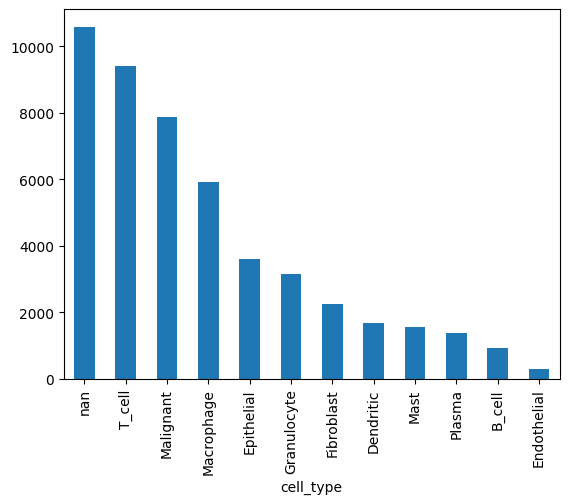

In [86]:
adata1_pancreatic.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

In [87]:
# Save ref data in h5ad file
adata1_pancreatic._X = adata1_pancreatic.X.toarray()
adata1_pancreatic.obs = adata1_pancreatic.obs.astype(str)
adata1_pancreatic.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/pancreatic_atlas.h5ad")

In [88]:
adata1_pancreatic = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/pancreatic_atlas.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


<Axes: xlabel='ct_cat'>

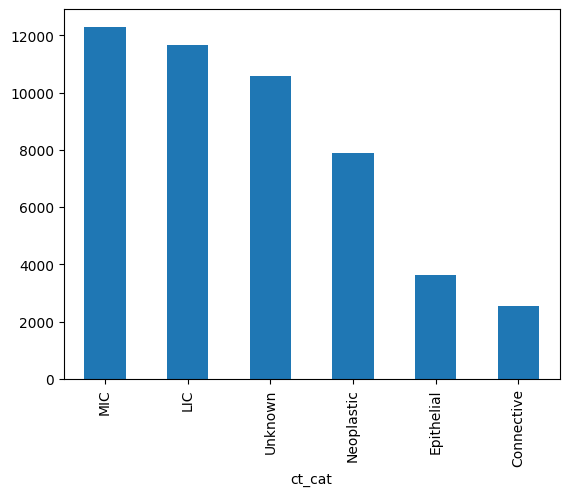

In [89]:
adata1_pancreatic.obs['ct_cat'] = adata1_pancreatic.obs['cell_type'].map(ct2cat)
adata1_pancreatic.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 7.2. Disco

In [90]:
# Open data
adata2_pancreatic = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_pancreatic_v01.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [91]:
adata2_pancreatic

AnnData object with n_obs × n_vars = 47171 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'sample', 'sample_id', 'project_id', 'sample_type', 'anatomical_site', 'disease', 'tissue', 'platform', 'age', 'gender', 'disease_stage', 'disease_grade', 'process_status', 'predicted_cell_type', 'ct'
    var: 'gene'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [92]:
# Rename gene column
adata2_pancreatic.var.columns = ['gene_name']
adata2_pancreatic.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [93]:
# Rename cell type column
adata2_pancreatic.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_pancreatic.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,sample,sample_id,project_id,sample_type,anatomical_site,disease,tissue,platform,age,gender,disease_stage,disease_grade,process_status,predicted_cell_type,cell_type
AAACCTGAGTAGCGGT-1--GSM4453628,0,5742.0,981,19,19,GSM4453628,GSM4453628,GSE148073,non-tumor disease tissue,pancreatic islet,type 1 diabetes,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,18:pancreatic beta cell,Delta cell
AAACCTGAGTGCCATT-1--GSM4453628,0,30894.0,4967,3,3,GSM4453628,GSM4453628,GSE148073,non-tumor disease tissue,pancreatic islet,type 1 diabetes,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,4:myofibroblast,Fibroblast
AAACCTGAGTGGGCTA-1--GSM4453628,0,38441.0,3623,2,2,GSM4453628,GSM4453628,GSE148073,non-tumor disease tissue,pancreatic islet,type 1 diabetes,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,0:Unknown,Acinar cell
AAACCTGCAAAGCAAT-1--GSM4453628,0,25070.0,5034,1,1,GSM4453628,GSM4453628,GSE148073,non-tumor disease tissue,pancreatic islet,type 1 diabetes,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,3:pancreatic ductal cell,TUBA1A ductal cell
AAACCTGCAATCGAAA-1--GSM4453628,0,11820.0,2836,3,3,GSM4453628,GSM4453628,GSE148073,non-tumor disease tissue,pancreatic islet,type 1 diabetes,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,4:myofibroblast,Fibroblast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAGCCTAG-1--GSM4453619,0,29308.0,5067,3,3,GSM4453619,GSM4453619,GSE148073,normal,pancreatic islet,NA,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,4:myofibroblast,Fibroblast
TTTGTCACACTGTTAG-1--GSM4453619,0,17264.0,3567,14,14,GSM4453619,GSM4453619,GSE148073,normal,pancreatic islet,NA,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,13:enterochromaffin cell,Alpha cell
TTTGTCAGTCGAGTTT-1--GSM4453619,0,18042.0,3391,14,14,GSM4453619,GSM4453619,GSE148073,normal,pancreatic islet,NA,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,13:enterochromaffin cell,Alpha cell
TTTGTCAGTGGTCTCG-1--GSM4453619,0,9223.0,1326,8,8,GSM4453619,GSM4453619,GSE148073,normal,pancreatic islet,NA,pancreas,10x3'v3,NaN,NA,NA,NA,QC pass,26:pancreatic beta cell,Beta cell


<Axes: xlabel='cell_type'>

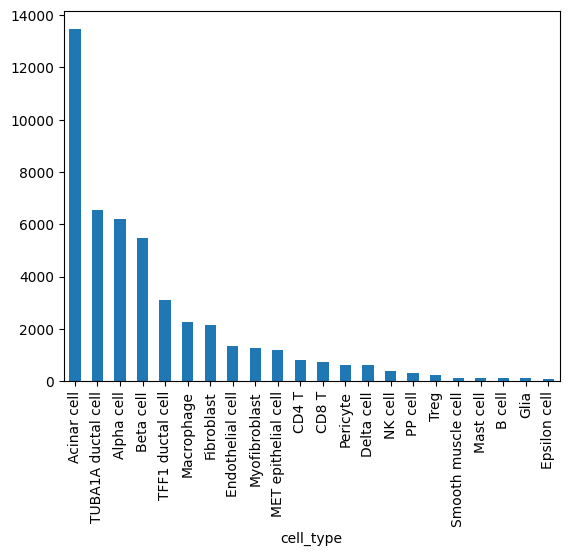

In [94]:
adata2_pancreatic.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 8. Skin cancer

### 8.1. Cancer cell atlas

Source:  
https://www.weizmann.ac.il/sites/3CA/skin  
https://www.weizmann.ac.il/sites/3CA/study-data/cell-types/20076

In [95]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Jerby-Arnon2018_Skin/Exp_data_TPM.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Jerby-Arnon2018_Skin/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Jerby-Arnon2018_Skin/Cells.csv")

adata1_skin = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [96]:
adata1_skin

AnnData object with n_obs × n_vars = 7186 × 23686
    obs: 'cell_name', 'sample', 'cell_type', 'source', 'cell_cohort', 'cell_subtype', 'complexity'
    var: 0

In [97]:
# Rename gene column and put as index
adata1_skin.var.columns = ['gene_name']
adata1_skin.var.set_index('gene_name', inplace=True)
adata1_skin.var

""
gene_name
C9orf152
RPS11
ELMO2
CREB3L1
PNMA1
...
PIK3IP1
SNRPD2
SLC39A6


In [98]:
adata1_skin.obs

,cell_name,sample,cell_type,source,cell_cohort,cell_subtype,complexity
0,cy78_CD45_neg_1_B04_S496_comb,Mel78,Malignant,post.treatment,Tirosh,Malignant,8258
1,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,Mel79,Malignant,treatment.naive,Tirosh,Malignant,2047
2,CY88_5_B10_S694_comb,Mel88,Malignant,post.treatment,Tirosh,Malignant,5375
3,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,Mel79,Malignant,treatment.naive,Tirosh,Malignant,5648
4,cy78_CD45_neg_3_H06_S762_comb,Mel78,Malignant,post.treatment,Tirosh,Malignant,7409
...,...,...,...,...,...,...,...
7181,CY75_1_CD45_CD8_3__S168_comb_BCD8,Mel75,T_cell,post.treatment,Tirosh,T_Cell_CD8,3530
7182,CY75_1_CD45_CD8_8__S338_comb_BCD8,Mel75,T_cell,post.treatment,Tirosh,T_Cell_CD8,3872
7183,monika_D7_S132_comb_BCD8_3,Mel75,T_cell,post.treatment,Tirosh,T_Cell_CD8,4589
7184,CY75_1_CD45_CD8_8__S289_comb_BCD8,Mel75,T_cell,post.treatment,Tirosh,T_Cell_CD8,4614


<Axes: xlabel='cell_type'>

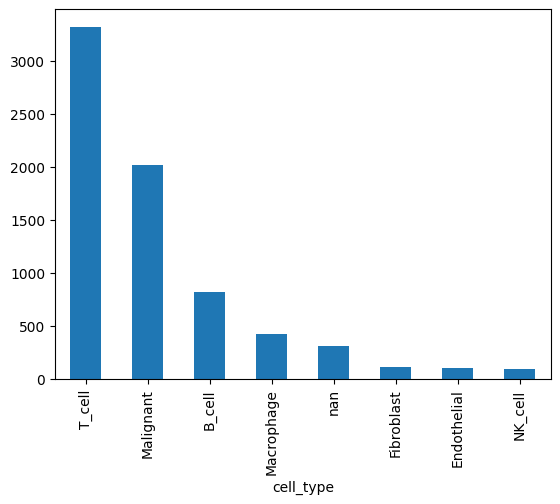

In [99]:
adata1_skin.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

<Axes: xlabel='cell_subtype'>

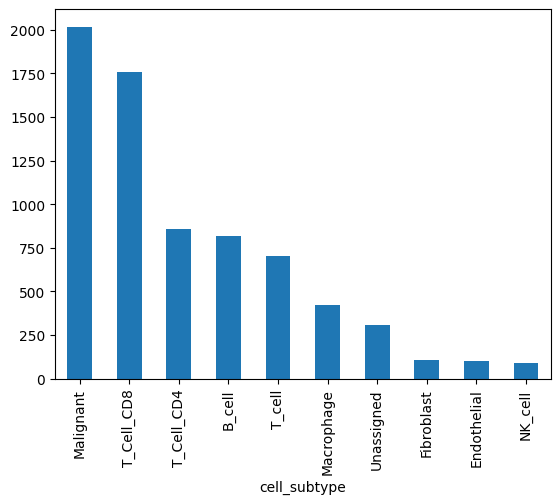

In [100]:
adata1_skin.obs["cell_subtype"].value_counts(dropna=False).plot(kind="bar")

In [101]:
# Save ref data in h5ad file
adata1_skin._X = adata1_skin.X.toarray()
adata1_skin.obs = adata1_skin.obs.astype(str)
adata1_skin.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/skin_atlas.h5ad")

In [102]:
adata1_skin = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/skin_atlas.h5ad")

<Axes: xlabel='ct_cat'>

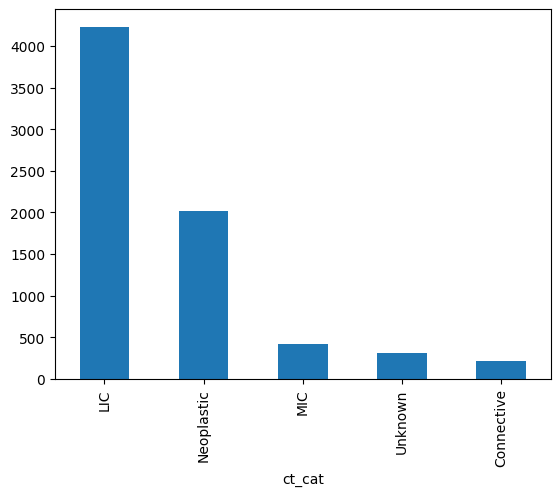

In [103]:
adata1_skin.obs['ct_cat'] = adata1_skin.obs['cell_type'].map(ct2cat)
adata1_skin.obs["ct_cat"].value_counts(dropna=False).plot(kind="bar")

### 8.2. Disco

In [104]:
# Open data
adata2_skin = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_skin_v01.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [105]:
adata2_skin

AnnData object with n_obs × n_vars = 394594 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'predicted_cell_type', 'sample', 'sample_id', 'project_id', 'sample_type', 'anatomical_site', 'disease', 'tissue', 'platform', 'cell_sorting', 'treatment', 'subject_id', 'age', 'gender', 'disease_stage', 'process_status', 'ct'
    var: 'gene'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [106]:
# Rename gene column
adata2_skin.var.columns = ['gene_name']
adata2_skin.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [107]:
# Rename cell type column
adata2_skin.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_skin.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,predicted_cell_type,sample,sample_id,project_id,sample_type,...,tissue,platform,cell_sorting,treatment,subject_id,age,gender,disease_stage,process_status,cell_type
AAACCCAAGAACAGGA-1--GSM4994379,0,8785.0,2334,43,9,3:endothelial cell,GSM4994379,GSM4994379,GSE163973,non-tumor disease tissue,...,skin,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,Venous EC
AAACCCAAGATCCTAC-1--GSM4994379,0,15858.0,3588,7,15,15:fibroblast,GSM4994379,GSM4994379,GSE163973,non-tumor disease tissue,...,skin,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,WISP2 fibroblast
AAACCCAAGCCTGACC-1--GSM4994379,0,12628.0,2984,43,9,3:endothelial cell,GSM4994379,GSM4994379,GSE163973,non-tumor disease tissue,...,skin,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,Venous EC
AAACCCAAGCGCAATG-1--GSM4994379,0,7064.0,1926,2,10,3:endothelial cell,GSM4994379,GSM4994379,GSE163973,non-tumor disease tissue,...,skin,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,Venous EC
AAACCCACAAACTCGT-1--GSM4994379,0,5225.0,1992,2,10,3:endothelial cell,GSM4994379,GSM4994379,GSE163973,non-tumor disease tissue,...,skin,10x3'v3,NA,NA,NA,NaN,NA,NA,QC pass,Venous EC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGTCCCGAC-1--GSM4567898,0,3589.0,1342,34,4,5:Treg,GSM4567898,GSM4567898,GSE151177,non-tumor disease tissue,...,skin,10x3'v2,NA,NA,NA,NaN,NA,NA,QC pass,Treg
TTTGGTTCATCTATCT-1--GSM4567898,0,5218.0,1537,5,13,18:granular keratinocyte,GSM4567898,GSM4567898,GSE151177,non-tumor disease tissue,...,skin,10x3'v2,NA,NA,NA,NaN,NA,NA,QC pass,Granular keratinocyte
TTTGGTTGTCCTACGG-1--GSM4567898,0,4677.0,1581,23,3,1:CD4 T cell,GSM4567898,GSM4567898,GSE151177,non-tumor disease tissue,...,skin,10x3'v2,NA,NA,NA,NaN,NA,NA,QC pass,CD4 T
TTTGGTTTCCGTAATG-1--GSM4567898,0,1167.0,514,0,0,2:spinous cell,GSM4567898,GSM4567898,GSE151177,non-tumor disease tissue,...,skin,10x3'v2,NA,NA,NA,NaN,NA,NA,QC pass,Granular keratinocyte


<Axes: xlabel='cell_type'>

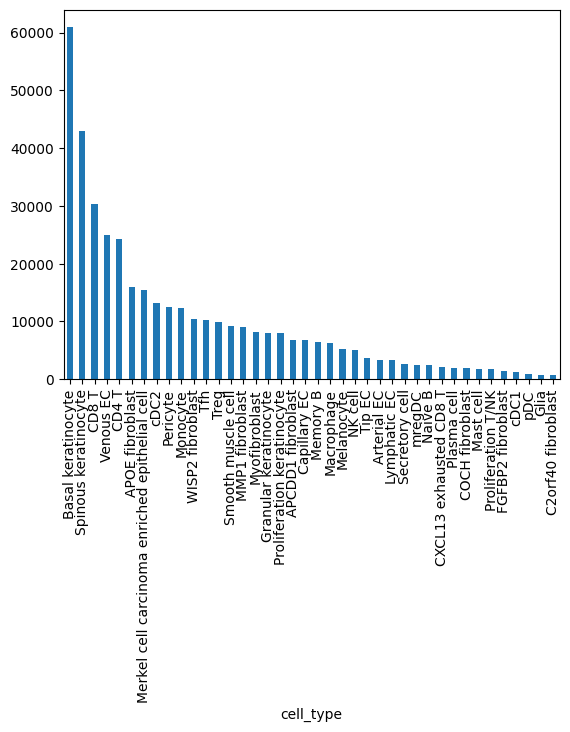

In [108]:
adata2_skin.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 9. Tonsil cancer

### 9.1. Cancer cell atlas

Nothing

### 9.2. Disco

In [109]:
# Open data
adata2_tonsil = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_tonsil_v01.h5ad")

In [110]:
adata2_tonsil

AnnData object with n_obs × n_vars = 273883 × 32577
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'sampleId', 'projectId', 'sampleType', 'tissue', 'platform', 'cellSorting', 'subjectId', 'age', 'gender', 'processStatus', 'RNA_snn_res.0.8', 'seurat_clusters', 'percent.mt', 'percent.rp', 'ct'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [111]:
# Rename gene column
adata2_tonsil.var.columns = ['gene_name']
adata2_tonsil.var

,gene_name
AL627309.1,AL627309.1
AL627309.3,AL627309.3
AL627309.4,AL627309.4
AL669831.2,AL669831.2
FAM87B,FAM87B
...,...
AC171558.1,AC171558.1
AC133551.1,AC133551.1
AC136612.1,AC136612.1
AC136616.1,AC136616.1


In [112]:
# Rename cell type column
adata2_tonsil.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata2_tonsil.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,sampleId,projectId,sampleType,tissue,platform,cellSorting,subjectId,age,gender,processStatus,RNA_snn_res.0.8,seurat_clusters,percent.mt,percent.rp,cell_type
wf4su8ny_h4yj8bv7_AAACGAATCCATTGGA-1--BCLL_13_T_1_hashing,0,1398.0,694,BCLL_13_T_1_hashing,BCLL_13_T_1_hashing,EGAS00001006375,Normal,tonsil,10x3'v3,NA,BCLL-13-T,5.0,F,QC pass,16,23,3.127221,14.570007,Macrophage
wf4su8ny_h4yj8bv7_ACGGTTAGTACGTACT-1--BCLL_13_T_1_hashing,0,1305.0,668,BCLL_13_T_1_hashing,BCLL_13_T_1_hashing,EGAS00001006375,Normal,tonsil,10x3'v3,NA,BCLL-13-T,5.0,F,QC pass,16,23,0.529902,29.295988,Macrophage
wf4su8ny_h4yj8bv7_ACTACGAGTTTCACTT-1--BCLL_13_T_1_hashing,0,1705.0,757,BCLL_13_T_1_hashing,BCLL_13_T_1_hashing,EGAS00001006375,Normal,tonsil,10x3'v3,NA,BCLL-13-T,5.0,F,QC pass,16,23,0.115942,17.043478,Macrophage
wf4su8ny_h4yj8bv7_AGAAGCGAGTGCCAGA-1--BCLL_13_T_1_hashing,0,2634.0,1125,BCLL_13_T_1_hashing,BCLL_13_T_1_hashing,EGAS00001006375,Normal,tonsil,10x3'v3,NA,BCLL-13-T,5.0,F,QC pass,16,23,0.264151,16.528302,Macrophage
wf4su8ny_h4yj8bv7_AGCCACGGTGGTAATA-1--BCLL_13_T_1_hashing,0,3462.0,782,BCLL_13_T_1_hashing,BCLL_13_T_1_hashing,EGAS00001006375,Normal,tonsil,10x3'v3,NA,BCLL-13-T,5.0,F,QC pass,16,23,6.925287,22.902299,mregDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGATAGTCA-1--GSM3375767,0,8965.0,2475,GSM3375767,GSM3375767,GSE119506,Normal,tonsil,10x3'v2,CD14+ cells,NA,NaN,NA,QC pass,14,21,2.554093,9.379880,MHC class II high monocyte/DC/macrophage
TTTGTCAAGTTCCACA-1--GSM3375767,0,7114.0,2007,GSM3375767,GSM3375767,GSE119506,Normal,tonsil,10x3'v2,CD14+ cells,NA,NaN,NA,QC pass,14,21,2.797301,26.173742,MHC class II high monocyte/DC/macrophage
TTTGTCACAGTAACGG-1--GSM3375767,0,5114.0,1700,GSM3375767,GSM3375767,GSE119506,Normal,tonsil,10x3'v2,CD14+ cells,NA,NaN,NA,QC pass,14,21,2.737583,19.612828,MHC class II high monocyte/DC/macrophage
TTTGTCAGTCTAACGT-1--GSM3375767,0,4661.0,1645,GSM3375767,GSM3375767,GSE119506,Normal,tonsil,10x3'v2,CD14+ cells,NA,NaN,NA,QC pass,14,21,3.304012,21.454623,MHC class II high monocyte/DC/macrophage


<Axes: xlabel='cell_type'>

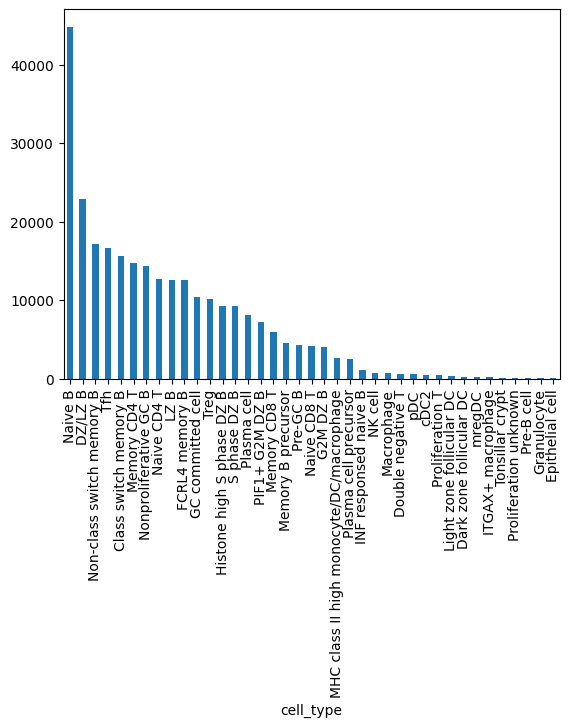

In [113]:
adata2_tonsil.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 10. Lymph node

No reference files => use bone marrow

## 11. Ovarian cancer

### Disco

In [5]:
# Open data
adata_ovarian = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_ovarian_cancer_v1.0.h5ad")

In [6]:
adata_ovarian

AnnData object with n_obs × n_vars = 46855 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'percent.mt', 'percent.rp', 'sample', 'sampleId', 'projectId', 'sampleType', 'disease', 'tissue', 'platform', 'age', 'gender', 'diseaseStage', 'processStatus', 'ct'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [7]:
# Rename gene column
adata_ovarian.var.columns = ['gene_name']
adata_ovarian.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [8]:
# Rename cell type column
adata_ovarian.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata_ovarian.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,percent.mt,percent.rp,sample,sampleId,projectId,sampleType,disease,tissue,platform,age,gender,diseaseStage,processStatus,cell_type
AAACCCAAGTATAGGT-1--GSM5599225,0,7247.0,2965,3,3,3.573893,15.068304,GSM5599225,GSM5599225,GSE184880,Primary Tumor,high-grade serous ovarian cancer,ovary,10x3'v3,50.0,F,IIIB,QC pass,Naive CD4 T cell
AAACCCACACCATAAC-1--GSM5599225,0,69215.0,8463,8,8,6.017482,6.709528,GSM5599225,GSM5599225,GSE184880,Primary Tumor,high-grade serous ovarian cancer,ovary,10x3'v3,50.0,F,IIIB,QC pass,Ovarian cancer enriched S100A9 MUC16 epithelia...
AAACCCACAGCTGCCA-1--GSM5599225,0,23429.0,5094,6,6,6.594392,2.804217,GSM5599225,GSM5599225,GSE184880,Primary Tumor,high-grade serous ovarian cancer,ovary,10x3'v3,50.0,F,IIIB,QC pass,Macrophage
AAACCCACATAACAGA-1--GSM5599225,0,8124.0,2947,5,5,5.083703,7.422452,GSM5599225,GSM5599225,GSE184880,Primary Tumor,high-grade serous ovarian cancer,ovary,10x3'v3,50.0,F,IIIB,QC pass,CD56 NK
AAACCCAGTGAATGTA-1--GSM5599225,0,15022.0,4496,8,8,12.754627,2.522966,GSM5599225,GSM5599225,GSE184880,Primary Tumor,high-grade serous ovarian cancer,ovary,10x3'v3,50.0,F,IIIB,QC pass,Ovarian cancer enriched S100A9 MUC16 epithelia...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGCATGCA-1--GSM5599220,0,11959.0,3472,0,0,8.838532,24.885024,GSM5599220,GSM5599220,GSE184880,Normal,NA,ovary,10x3'v3,55.0,F,NA,QC pass,PLEKHG2 fibroblast
TTTGTTGCACGAAAGC-1--GSM5599220,0,10025.0,3209,0,0,7.670823,22.793017,GSM5599220,GSM5599220,GSE184880,Normal,NA,ovary,10x3'v3,55.0,F,NA,QC pass,PLEKHG2 fibroblast
TTTGTTGTCTCCAAGA-1--GSM5599220,0,10200.0,3150,0,0,9.137255,25.686275,GSM5599220,GSM5599220,GSE184880,Normal,NA,ovary,10x3'v3,55.0,F,NA,QC pass,PLEKHG2 fibroblast
TTTGTTGTCTGGGTCG-1--GSM5599220,0,9832.0,3447,14,14,6.112693,7.272172,GSM5599220,GSM5599220,GSE184880,Normal,NA,ovary,10x3'v3,55.0,F,NA,QC pass,CD16 NK


<Axes: xlabel='cell_type'>

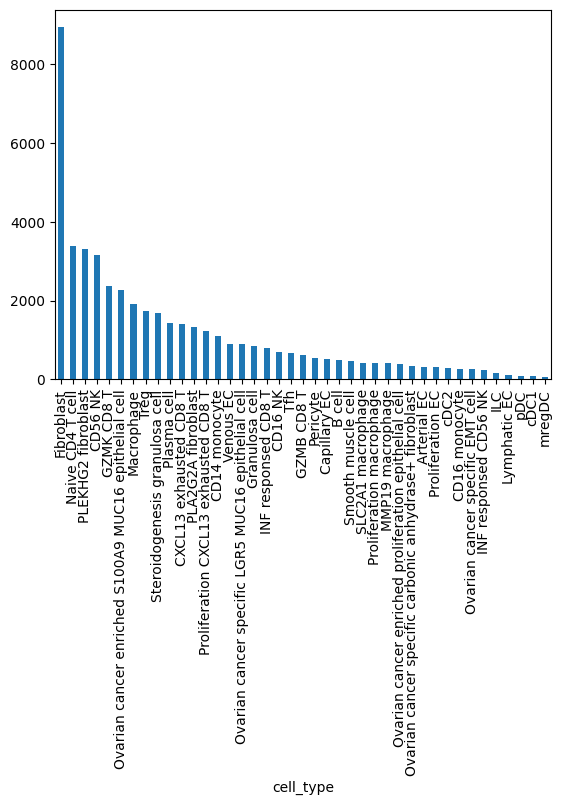

In [9]:
adata_ovarian.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 12. Brain cancer

### Disco

In [10]:
# Open data
adata_brain = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_brain_v01.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [11]:
adata_brain

AnnData object with n_obs × n_vars = 285669 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'predicted_cell_type', 'sample', 'sample_id', 'project_id', 'sample_type', 'anatomical_site', 'disease', 'tissue', 'platform', 'subject_id', 'age', 'gender', 'race', 'alcohol_intake', 'batch', 'library', 'pmi', 'sample_ph', 'process_status', 'ct'
    var: 'gene'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [12]:
# Rename gene column
adata_brain.var.columns = ['gene_name']
adata_brain.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [13]:
# Rename cell type column
adata_brain.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata_brain.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,predicted_cell_type,sample,sample_id,project_id,sample_type,...,age,gender,race,alcohol_intake,batch,library,pmi,sample_ph,process_status,cell_type
AAACCCAAGCGCCCAT-1--GSM4775576,0,2675.0,1885,17,24,26:L5/6 FEZF2 CABP7 projection neuron,GSM4775576,GSM4775576,GSE157827,normal,...,NaN,NA,NA,NA,NA,NA,NaN,NA,QC pass,L6 excitatory neuron
AAACCCAAGGGTAATT-1--GSM4775576,0,900.0,719,2,10,11:L2/4 PVALB C8orf4 inhibitory interneuron,GSM4775576,GSM4775576,GSE157827,normal,...,NaN,NA,NA,NA,NA,NA,NaN,NA,QC pass,PVALB inhibitory neuron
AAACCCAAGGTCGTAG-1--GSM4775576,0,1009.0,863,24,5,5:oligodendrocyte progenitor cell,GSM4775576,GSM4775576,GSE157827,normal,...,NaN,NA,NA,NA,NA,NA,NaN,NA,QC pass,Oligodendrocyte progenitor cell
AAACCCAAGTAGTCCT-1--GSM4775576,0,4640.0,2936,26,7,15:L4/5 RORB HNRNPA1P46 IT excitatory neuron,GSM4775576,GSM4775576,GSE157827,normal,...,NaN,NA,NA,NA,NA,NA,NaN,NA,QC pass,L4 excitatory neuron
AAACCCACAATGTGGG-1--GSM4775576,0,3071.0,2050,25,6,6:L2/3 LINC00507 RPL9P17 excitatory neuron,GSM4775576,GSM4775576,GSE157827,normal,...,NaN,NA,NA,NA,NA,NA,NaN,NA,QC pass,L2/3 excitatory neuron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTCCTTGTC-1--GSM5292854,0,4099.0,2173,23,4,7:L2/3 LINC00507 RPL9P17 excitatory neuron,GSM5292854,GSM5292854,GSE174367,normal,...,79.0,M,NA,NA,NA,NA,5.0,NA,QC pass,L2/3 excitatory neuron
TTTGTTGAGCCATGCC-1--GSM5292854,0,3446.0,2073,24,5,5:oligodendrocyte progenitor cell,GSM5292854,GSM5292854,GSE174367,normal,...,79.0,M,NA,NA,NA,NA,5.0,NA,QC pass,Oligodendrocyte progenitor cell
TTTGTTGGTATTCCGA-1--GSM5292854,0,862.0,597,0,0,0:L4/6 OPALIN oligodendrocyte,GSM5292854,GSM5292854,GSE174367,normal,...,79.0,M,NA,NA,NA,NA,5.0,NA,QC pass,Oligodendrocyte
TTTGTTGTCCCAAGCG-1--GSM5292854,0,2518.0,1432,0,0,0:L4/6 OPALIN oligodendrocyte,GSM5292854,GSM5292854,GSE174367,normal,...,79.0,M,NA,NA,NA,NA,5.0,NA,QC pass,Oligodendrocyte


<Axes: xlabel='cell_type'>

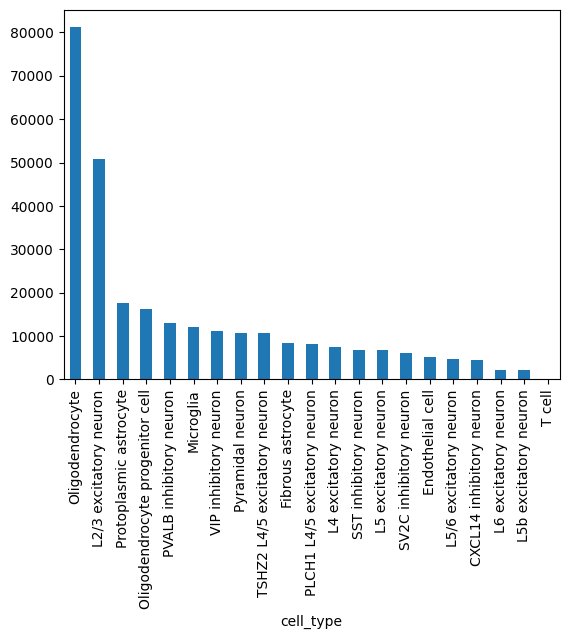

In [14]:
adata_brain.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 13. Bone marrow

### Disco

In [15]:
# Open data
adata_bone_marrow = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/disco/disco_bone_marrow_v2.0.h5ad")

In [16]:
adata_bone_marrow

AnnData object with n_obs × n_vars = 673750 × 33538
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_raw', 'nFeature_raw', 'sample', 'sample_id', 'project_id', 'tissue', 'platform', 'age_group', 'cell_sorting', 'subject_id', 'age', 'gender', 'fetal_age_week', 'ct'
    var: 'gene'

In [17]:
# Rename gene column
adata_bone_marrow.var.columns = ['gene_name']
adata_bone_marrow.var

,gene_name
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1
AC213203.1,AC213203.1


In [18]:
# Rename cell type column
adata_bone_marrow.obs.rename(columns={"ct": "cell_type"}, inplace=True)
adata_bone_marrow.obs

,nCount_RNA,nFeature_RNA,nCount_raw,nFeature_raw,sample,sample_id,project_id,tissue,platform,age_group,cell_sorting,subject_id,age,gender,fetal_age_week,cell_type
AAACCTGCACCACCAG-1_1--MantonBM7,0.0,0.0,0.0,0.0,MantonBM7,MantonBM7,HCA_HematopoieticImmuneCellAtlas,bone marrow,10x3'v2,,,MantonBM7,36,F,-2147483648,Naive B cell
AAACCTGCAGATAATG-1_1--MantonBM7,0.0,0.0,0.0,0.0,MantonBM7,MantonBM7,HCA_HematopoieticImmuneCellAtlas,bone marrow,10x3'v2,,,MantonBM7,36,F,-2147483648,preB cell
AAACCTGCAGCGTAAG-1_1--MantonBM7,0.0,0.0,0.0,0.0,MantonBM7,MantonBM7,HCA_HematopoieticImmuneCellAtlas,bone marrow,10x3'v2,,,MantonBM7,36,F,-2147483648,S100A+ preNeutrophil (cycling)
AAACCTGCATACGCCG-1_1--MantonBM7,0.0,0.0,0.0,0.0,MantonBM7,MantonBM7,HCA_HematopoieticImmuneCellAtlas,bone marrow,10x3'v2,,,MantonBM7,36,F,-2147483648,Naive B cell
AAACCTGTCTAACTGG-1_1--MantonBM7,0.0,0.0,0.0,0.0,MantonBM7,MantonBM7,HCA_HematopoieticImmuneCellAtlas,bone marrow,10x3'v2,,,MantonBM7,36,F,-2147483648,Naive CD8 T cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTATAAACG-1--ERX4327600,0.0,0.0,0.0,0.0,ERX4327600,ERX4327600,E-MTAB-9389,,10x3'v2,,,F29,-2147483648,F,17,proB cell (cycling)
TTTGGTTTCACCTCGT-1--ERX4327600,0.0,0.0,0.0,0.0,ERX4327600,ERX4327600,E-MTAB-9389,,10x3'v2,,,F29,-2147483648,F,17,proB cell (cycling)
TTTGTCAAGTAGCGGT-1--ERX4327600,0.0,0.0,0.0,0.0,ERX4327600,ERX4327600,E-MTAB-9389,,10x3'v2,,,F29,-2147483648,F,17,pre-pDC (myeloid origin)
TTTGTCACAATGGAAT-1--ERX4327600,0.0,0.0,0.0,0.0,ERX4327600,ERX4327600,E-MTAB-9389,,10x3'v2,,,F29,-2147483648,F,17,preB cell (cycling)


<Axes: xlabel='cell_type'>

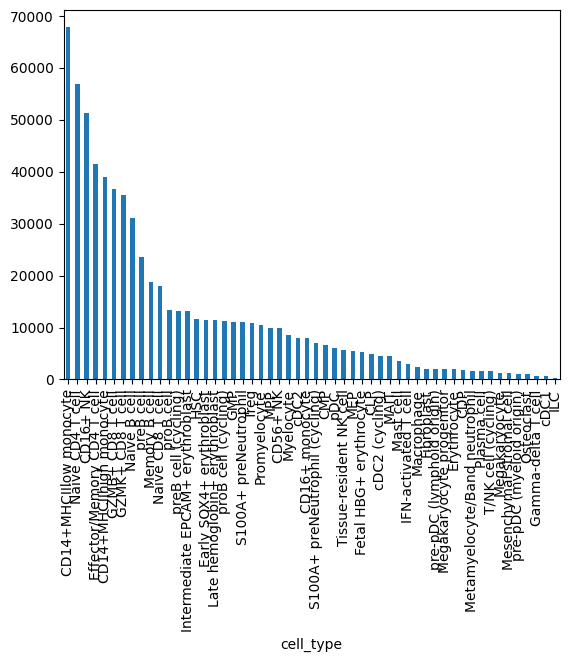

In [19]:
adata_bone_marrow.obs["cell_type"].value_counts(dropna=False).plot(kind="bar")

## 14. Bone

No reference file => use bone marrow

## 15. Prostate cancer

### Cancer cell atlas

In [30]:
# Open data

counts = mmread("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Song2022_Prostate/Exp_data_UMIcounts.mtx")

genes_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Song2022_Prostate/Genes.txt", header=None)
genes = list(genes_df[0])

cells_df = pd.read_csv("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/Data_Song2022_Prostate/Cells.csv")

adata_prostate = sc.AnnData(X=counts.T, var=genes, obs=cells_df)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [31]:
adata_prostate

AnnData object with n_obs × n_vars = 21743 × 21877
    obs: 'cell_name', 'sample', 'cell_type', 'cell_subtype', 'patient', 'source', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margins', 'LVI', 'PNI', 'TRUS', 'MRI', 'metastatic_workup', 'post_op_psa', 'PSA_follow_up', 'time_to_follow_up', 'complexity'
    var: 0

In [32]:
adata_prostate.var

,0
0,A1BG-AS1
1,A1CF
2,A2M
3,A2M-AS1
4,A2ML1
...,...
21872,SULT4A1
21873,TMEM196
21874,TWIST2
21875,ZFHX4-AS1


In [33]:
adata_prostate.var.columns = ['gene']
adata_prostate.var.set_index('gene', inplace=True, drop=False)
adata_prostate.var.index.name = None
adata_prostate.var

,gene
A1BG-AS1,A1BG-AS1
A1CF,A1CF
A2M,A2M
A2M-AS1,A2M-AS1
A2ML1,A2ML1
...,...
SULT4A1,SULT4A1
TMEM196,TMEM196
TWIST2,TWIST2
ZFHX4-AS1,ZFHX4-AS1


In [34]:
adata_prostate.obs

,cell_name,sample,cell_type,cell_subtype,patient,source,cancer_cell_state,PSA,source_region,gleason_score,...,margins,LVI,PNI,TRUS,MRI,metastatic_workup,post_op_psa,PSA_follow_up,time_to_follow_up,complexity
0,AUG_PB1,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6755
1,AUG_PB1_1,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7285
2,AUG_PB1_2,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8204
3,AUG_PB1_3,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7234
4,AUG_PB1_4,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21738,PR5199_1020,PR5199,Fibroblast,Fibroblast,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,453
21739,PR5199_1021,PR5199,Smooth_muscle,Smooth_muscle,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,412
21740,PR5199_1022,PR5199,Smooth_muscle,Smooth_muscle,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,382
21741,PR5199_1023,PR5199,Myeloid,Myeloid,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,423


In [35]:
adata_prostate.obs.rename(columns={"cell_type": "ct"}, inplace=True)
adata_prostate.obs

,cell_name,sample,ct,cell_subtype,patient,source,cancer_cell_state,PSA,source_region,gleason_score,...,margins,LVI,PNI,TRUS,MRI,metastatic_workup,post_op_psa,PSA_follow_up,time_to_follow_up,complexity
0,AUG_PB1,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6755
1,AUG_PB1_1,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7285
2,AUG_PB1_2,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8204
3,AUG_PB1_3,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7234
4,AUG_PB1_4,AUG_PB1,Epithelial,Epithelial,Patient1,Tumor,Luminal,7.2,left-mid,"1A: left-mid; 15% cancer, no pattern 4; 3+3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21738,PR5199_1020,PR5199,Fibroblast,Fibroblast,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,453
21739,PR5199_1021,PR5199,Smooth_muscle,Smooth_muscle,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,412
21740,PR5199_1022,PR5199,Smooth_muscle,Smooth_muscle,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,382
21741,PR5199_1023,PR5199,Myeloid,Myeloid,Patient6,Tumor,NaN,16.5,NaN,4+3,...,negative,present,present,cT1c,NaN,NaN,0.252,0.042 (after radiation),11 months,423


<Axes: xlabel='ct'>

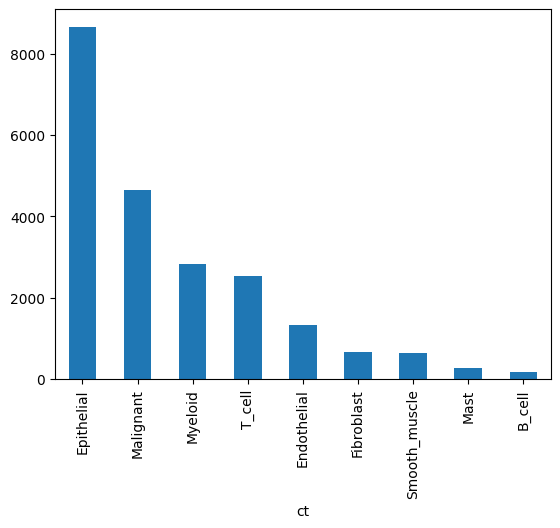

In [36]:
adata_prostate.obs["ct"].value_counts(dropna=False).plot(kind="bar")

In [37]:
# Save ref data in h5ad file
adata_prostate._X = adata_prostate.X.toarray()
adata_prostate.obs = adata_prostate.obs.astype(str)
adata_prostate.write_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/cancer_cell_atlas/adatas/prostate_atlas.h5ad")

## Other. More precise immune classification ?

Source:  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8494216/  
https://zenodo.org/records/5205544

In [2]:
# Open data
adata_immune = sc.read_h5ad("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/sc_atlas/TICAtlas.h5ad")
adata_immune

AnnData object with n_obs × n_vars = 342758 × 106117
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'percent.mt', 'gender', 'subtype', 'source', 'lv1_annot', 'lv2_annot', 'kmeans_cluster'
    var: '_index', 'features'
    obsm: 'X_umap'

In [3]:
adata_immune.obs

,orig.ident,nCount_RNA,nFeature_RNA,patient,percent.mt,gender,subtype,source,lv1_annot,lv2_annot,kmeans_cluster
BC_1_X121270372023221_1_1_1_1,0,29.100000,30,BC_1,14.432989,female,BC,breast,CD4 recently activated,CD4 effector memory RA,1
BC_1_X121270372579243_1_1_1_1,0,298.600000,208,BC_1,5.592766,female,BC,breast,CD4 naive-memory,CD4 memory stem cells,1
BC_1_X121270372616437_1_1_1_1,0,267.400001,199,BC_1,16.043381,female,BC,breast,Mast cells,CD4 effector memory RA,1
BC_1_X121270376229286_1_1_1_1,0,13.300000,12,BC_1,15.037594,female,BC,breast,CD4 recently activated,CD4 effector memory RA,1
BC_1_X121270378085085_1_1_1_1,0,295.199999,193,BC_1,11.924119,female,BC,breast,CD4 naive-memory,CD4 memory stem cells,1
...,...,...,...,...,...,...,...,...,...,...,...
UM_11_TTGACTTCAGCTCGAC,15,8427.000000,2343,UM_11,7.108105,female,UM,uveal melanoma,TAMs proinflamatory,Monocytes tumor infiltrating,-2147483648
UM_11_TTGTAGGTCCGCAGTG,15,2523.000000,1118,UM_11,0.118906,female,UM,uveal melanoma,T helper cells,T helper/Th17,-2147483648
UM_11_TTTACTGGTGGCTCCA,15,19245.000000,4406,UM_11,3.564562,female,UM,uveal melanoma,T cells proliferative,T cells proliferative,-2147483648
UM_11_TTTATGCGTTGCTCCT,15,5659.000000,2040,UM_11,6.290864,female,UM,uveal melanoma,T cells regulatory,T cells regulatory,-2147483648


In [4]:
adata_immune.var

,_index,features
0,TSPAN6,TSPAN6
1,DPM1,DPM1
2,SCYL3,SCYL3
3,FGR,FGR
4,CFH,CFH
...,...,...
106112,ZNF84.1,ZNF84.1
106113,RBL1.1,RBL1.1
106114,IDS.1,IDS.1
106115,KBTBD4.1,KBTBD4.1


In [5]:
adata_immune.obs["lv1_annot"].value_counts(dropna=False)

lv1_annot
CD8 cytotoxic               44849
CD4 naive-memory            32603
CD8 terminally exhausted    27857
CD4 effector memory         26130
T cells regulatory          25486
T cells naive               24344
B cells                     20704
CD4 recently activated      18080
TAMs C1QC                   17933
CD8 effector memory         13797
NK                          12141
T cells proliferative       11451
T helper cells              11420
Monocytes                   10995
Plasma B cells               8155
TAMs proinflamatory          7438
mDC                          5656
Macrophages SPP1             5505
CD4 transitional memory      4871
CD8 pre-exhausted            4789
cDC                          2379
Mast cells                   2255
pDC                          2192
Macro. and mono. prolif.      941
B cells proliferative         787
Name: count, dtype: int64

<Axes: xlabel='lv1_annot'>

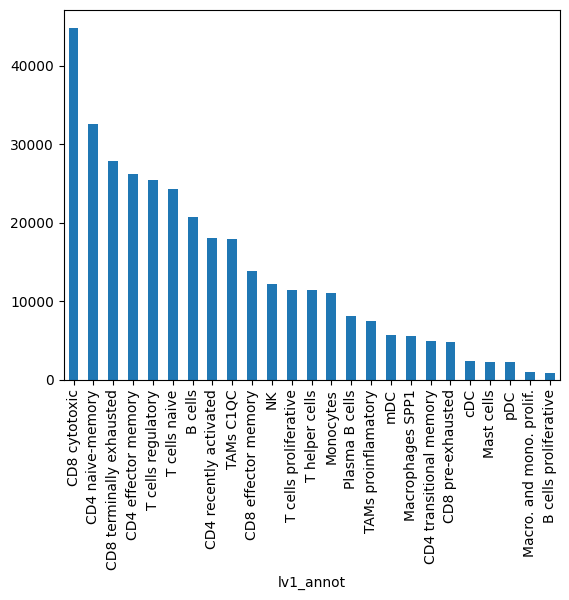

In [6]:
adata_immune.obs["lv1_annot"].value_counts().plot(kind="bar")

In [7]:
adata_immune.obs["lv2_annot"].value_counts()

lv2_annot
CD4 memory stem cells           65545
CD8 exhausted                   32256
CD8 cytotoxic                   31062
CD4 resident effector memory    24380
T cells regulatory              21930
CD4 effector memory RA          20980
TAMs C1QC                       20308
NK                              18633
Monocytes tumor infiltrating    12825
CD4 activated                   12195
T cells proliferative           10907
CD4 transitional memory          9318
B cells unswitched memory        9197
B cells memory                   8293
Plasma B cells                   7111
DC2 CD1C+                        5790
CD8 IFN activated                5563
CD8 activated                    5237
Macrophages SPP1                 4196
DC4 CD1C-                        3292
T helper/Th17                    2912
pDC                              2190
DC3 LAMP3                        1525
B cells activated                1438
Macro. and mono. prolif.         1063
Macrophages CXCL10                984
Ma

<Axes: xlabel='lv2_annot'>

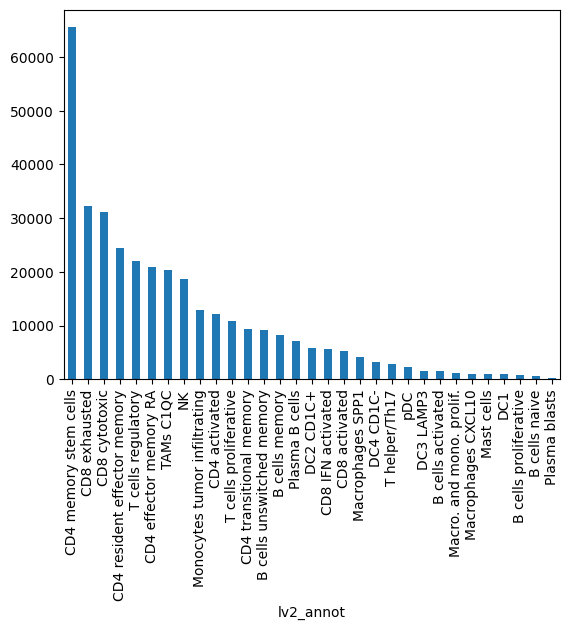

In [8]:
adata_immune.obs["lv2_annot"].value_counts().plot(kind="bar")

<Axes: xlabel='source'>

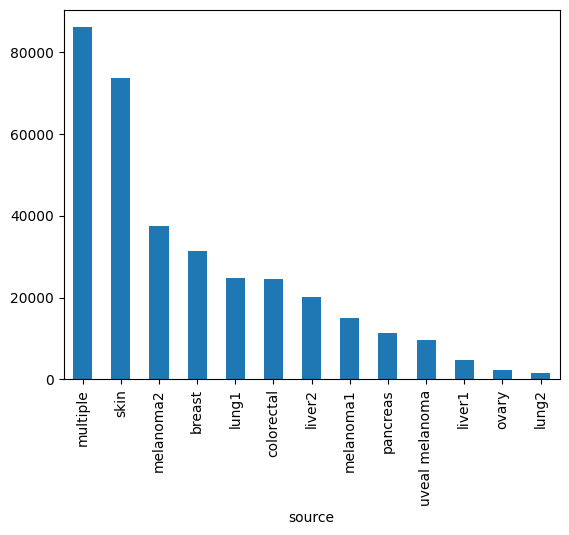

In [9]:
adata_immune.obs["source"].value_counts().plot(kind="bar")